
# **UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS**

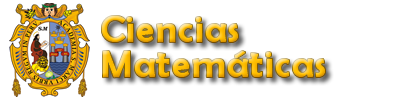


**APLICACIÓN PRÁCTICA E INFORME FINAL**

ESCUELA:

*   Estadistica

CURSO:

*   BIG DATA

PROFESOR:

*   Guevara Ponce, Victor

INTEGRANTES:

*   Yupanqui Duran, jorge Ivan




Julio, 2024



# Aplicación Práctica e Informe Final

## Resultados del Aprendizaje
El estudiante aplica apropiadamente los conocimientos recibidos de las técnicas de análisis de big data para explicar y analizar datos de grandes volúmenes y para tomar decisiones certeras. Además de eso, diseñar estrategias para contribuir a los objetivos del negocio mediante técnicas de análisis de datos.

---

## Caso: Comportamiento de Compras de Clientes

### Contexto
Una empresa local se enfrenta a desafíos significativos en su estrategia de marketing y retención de clientes. A pesar de contar con una amplia base de datos que incluye detalles demográficos y comportamiento de compra de sus clientes, las campañas de marketing actuales no están logrando los resultados deseados en términos de conversión y lealtad del cliente.

### Datos Disponibles
1. **ID**: Identificador único del cliente
2. **Año de Nacimiento**: Año de nacimiento del cliente
3. **Nivel Educativo**: Nivel educativo alcanzado por el cliente
4. **Estado Civil**: Estado civil del cliente
5. **Salario Anual**: Ingresos anuales del cliente
6. **Niños en Casa**: Número de niños en el hogar
7. **Adolescentes en Casa**: Número de adolescentes en el hogar
8. **Fecha de Registro**: Fecha en que el cliente se registró
9. **Días Desde la Última Compra**: Días transcurridos desde la última compra
10. **Gasto en Electrónicos**: Total gastado en productos electrónicos
11. **Gasto en Juguetes**: Total gastado en juguetes
12. **Gasto en Muebles**: Total gastado en muebles
13. **Gasto en Artículos para el Hogar**: Total gastado en artículos para el hogar
14. **Gasto en Alimentos**: Total gastado en alimentos
15. **Gasto en Ropa**: Total gastado en ropa
16. **Número de Compras con Descuento**: Número de compras realizadas con descuento
17. **Número de Compras en la Web**: Número de compras realizadas en el sitio web
18. **Número de Compras por Catálogo**: Número de compras realizadas por catálogo
19. **Número de Compras en la Tienda**: Número de compras realizadas en la tienda física
20. **Número de Visitas al Sitio Web por Mes**: Número de visitas al sitio web por mes
21. **Compra en la Campaña 1**: Indicador de participación en la Campaña 1 (Sí/No)
22. **Compra en la Campaña 2**: Indicador de participación en la Campaña 2 (Sí/No)
23. **Compra en la Campaña 3**: Indicador de participación en la Campaña 3 (Sí/No)
24. **Compra en la Campaña 4**: Indicador de participación en la Campaña 4 (Sí/No)
25. **Compra en la Campaña 5**: Indicador de participación en la Campaña 5 (Sí/No)
26. **Compró**: Indicador de si realizó una compra (Sí/No)
27. **País**: País de residencia del cliente

---

### Problemas Identificados
1. **Falta de Segmentación Eficaz**: Las campañas de marketing no están segmentadas adecuadamente.
2. **Problemática de las Campañas de Marketing**: Las campañas actuales muestran bajas tasas de conversión debido a la falta de personalización.

---

### Objetivo del Proyecto
El objetivo es segmentar a los clientes aplicando análisis de RFM y técnicas de clustering para segmentar a los clientes en grupos homogéneos basados en sus comportamientos de compra y características demográficas.

Esto permitirá:
- Personalizar Estrategias de Marketing
- Optimizar la Retención del Cliente
- Mejorar la Eficiencia de las Campañas
- Reducir los costos de marketing

### Algoritmos a Investigar y Aplicar
- **CLARANS**
- **BIRCH**
- **CURE**

# Desarrollo del Proyecto

# Instalacion e Importacion

Instalacion e importacion de librerias importantes para el manejo de la data

### Instalación de Librerías

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn
!pip install pyclustering
!pip install git+https://github.com/scikit-learn-contrib/scikit-learn-extra.git
!pip install kmodes minisom pyclustering
!pip install umap-learn

ERROR: Operation cancelled by user
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/


### Importación de Librerías y Datos



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.ensemble import IsolationForest
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from minisom import MiniSom
from scipy.cluster.hierarchy import fcluster, linkage
from pyclustering.cluster.cure import cure
from pyclustering.utils import timedcall
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import pairwise_distances
import random


# EDA: Análisis Exploratorio de Datos

El análisis exploratorio de datos (EDA) comienza con la carga del archivo de datos dados_marketing.csv, seguido de la visualización de los primeros registros y una descripción estadística completa de las variables. Se analiza la distribución de variables numéricas mediante histogramas con ajuste KDE y las variables categóricas utilizando gráficos de conteo. Se visualizan los valores faltantes con un mapa de calor y se examinan las correlaciones entre variables numéricas a través de una matriz de correlación.

### Cargar los Datos

In [ ]:
# Cargar los datos
file_path = '/content/dados_marketing.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')


### Mostrar los primeros registros

In [ ]:
data.head()

ID  Año de Nacimiento Nivel Educativo Estado Civil  Salario Anual  \
0   2795               1958        Mestrado     Solteiro        30523.0   
1   2285               1954        Mestrado       Casado        36634.0   
2    115               1966        Mestrado     Solteiro        43456.0   
3  10470               1979        Mestrado     Solteiro        40662.0   
4   4065               1976       Doutorado     Solteiro        49544.0   

   Niños en Casa  Adolescentes en Casa Fecha de Registro  \
0              2                     1         7/01/2020   
1              0                     1         5/12/2023   
2              0                     1         3/02/2023   
3              1                     0         3/05/2023   
4              1                     0         2/11/2020   

   Días Desde la Última Compra  Gasto en Electrónicos  ...  \
0                            0                      5  ...   
1                            0                    213  ...   
2                            0                    275  ...   
3                            0                     40  ...   
4                            0                    308  ...   

   Número de Compras por Catálogo  Número de Compras en la Tienda  \
0                               0                               2   
1                               2                               5   
2                               1                               8   
3                               1                               3   
4                               1                               8   

   Número de Visitas al Sitio Web por Mes  Compra en la Campaña 1  \
0                                       7                       0   
1                                       7                       0   
2                                       5                       0   
3                                       4                       0   
4                                       7                       0   

   Compra en la Campaña 2  Compra en la Campaña 3  Compra en la Campaña 4  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Compra en la Campaña 5  Compró            País  
0                       0       0           Chile  
1                       0       0         Espanha  
2                       0       0       Argentina  
3                       0       0        Alemanha  
4                       0       0  Estados Unidos  

[5 rows x 27 columns]

### Descripción Estadística de los Datos

In [ ]:
data.describe(include='all')

ID  Año de Nacimiento Nivel Educativo Estado Civil  \
count    2000.000000        2000.000000            2000         2000   
unique           NaN                NaN               5            3   
top              NaN                NaN  Curso Superior     Solteiro   
freq             NaN                NaN            1000         1197   
mean     5617.382500        1968.797000             NaN          NaN   
std      3259.910118          11.981468             NaN          NaN   
min         0.000000        1893.000000             NaN          NaN   
25%      2814.750000        1959.000000             NaN          NaN   
50%      5492.000000        1970.000000             NaN          NaN   
75%      8495.000000        1977.000000             NaN          NaN   
max     11191.000000        1996.000000             NaN          NaN   

        Salario Anual  Niños en Casa  Adolescentes en Casa Fecha de Registro  \
count     1981.000000    2000.000000           2000.000000              2000   
unique            NaN            NaN                   NaN               387   
top               NaN            NaN                   NaN         5/04/2021   
freq              NaN            NaN                   NaN                32   
mean     52290.852600       0.447500              0.503000               NaN   
std      25484.701911       0.535151              0.540497               NaN   
min       1730.000000       0.000000              0.000000               NaN   
25%      35196.000000       0.000000              0.000000               NaN   
50%      51766.000000       0.000000              0.000000               NaN   
75%      68281.000000       1.000000              1.000000               NaN   
max     666666.000000       2.000000              2.000000               NaN   

        Días Desde la Última Compra  Gasto en Electrónicos  ...  \
count                    2000.00000             2000.00000  ...   
unique                          NaN                    NaN  ...   
top                             NaN                    NaN  ...   
freq                            NaN                    NaN  ...   
mean                       43.73500              303.92850  ...   
std                        25.85885              337.84483  ...   
min                         0.00000                0.00000  ...   
25%                        22.00000               23.00000  ...   
50%                        45.00000              175.50000  ...   
75%                        66.00000              503.25000  ...   
max                        88.00000             1493.00000  ...   

        Número de Compras por Catálogo  Número de Compras en la Tienda  \
count                      2000.000000                     2000.000000   
unique                             NaN                             NaN   
top                                NaN                             NaN   
freq                               NaN                             NaN   
mean                          2.635500                        5.797500   
std                           2.885793                        3.275952   
min                           0.000000                        0.000000   
25%                           0.000000                        3.000000   
50%                           2.000000                        5.000000   
75%                           4.000000                        8.000000   
max                          28.000000                       13.000000   

        Número de Visitas al Sitio Web por Mes  Compra en la Campaña 1  \
count                              2000.000000             2000.000000   
unique                                     NaN                     NaN   
top                                        NaN                     NaN   
freq                                       NaN                     NaN   
mean                                  5.327500                0.074000   
std                                   2.440947        

### Distribución de Variables Numéricas


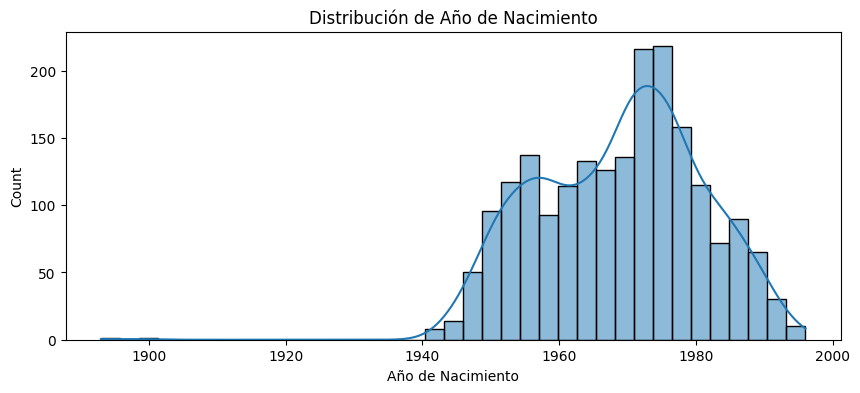

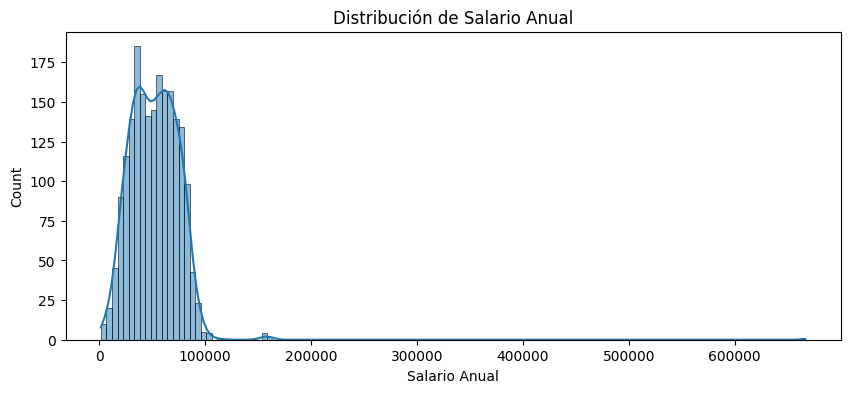

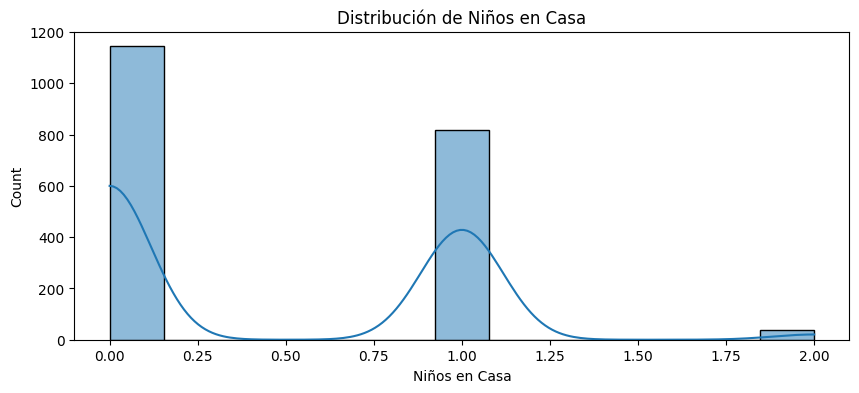

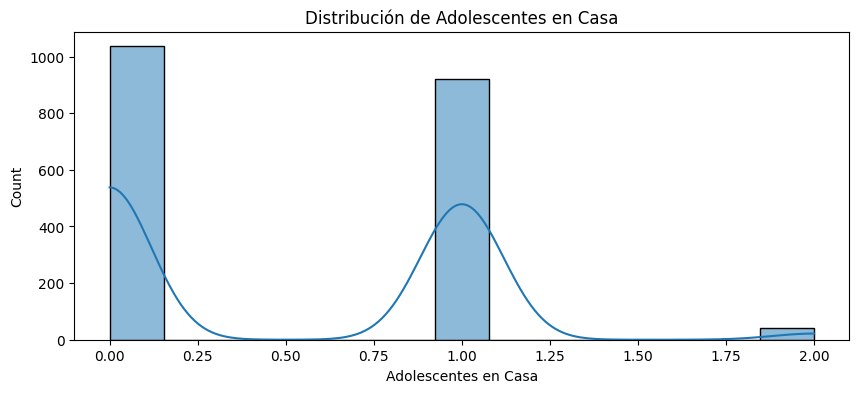

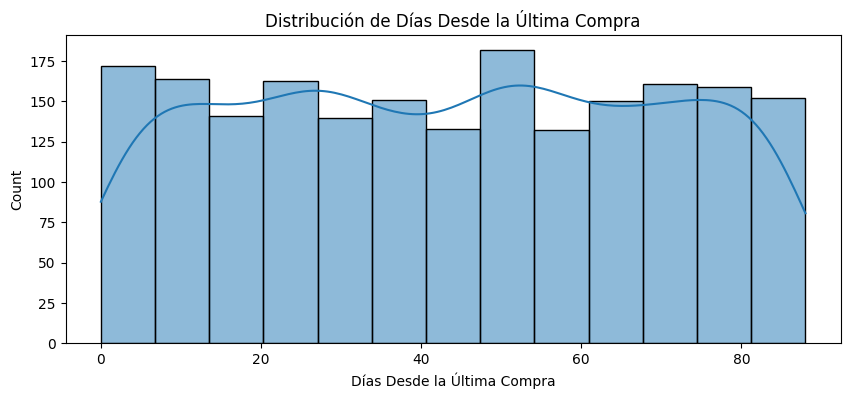

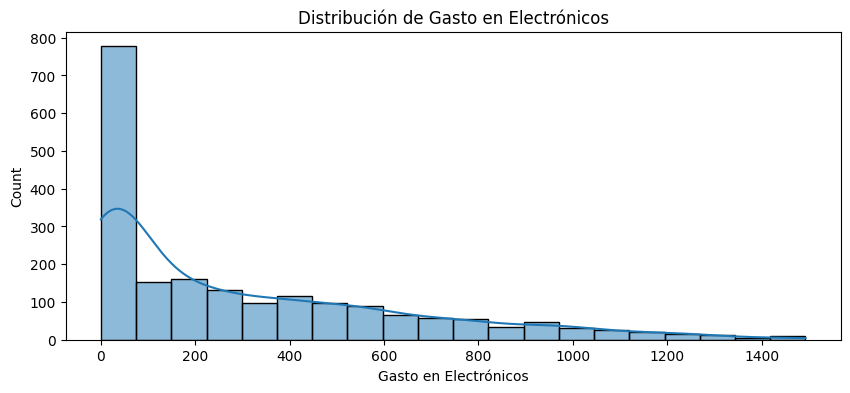

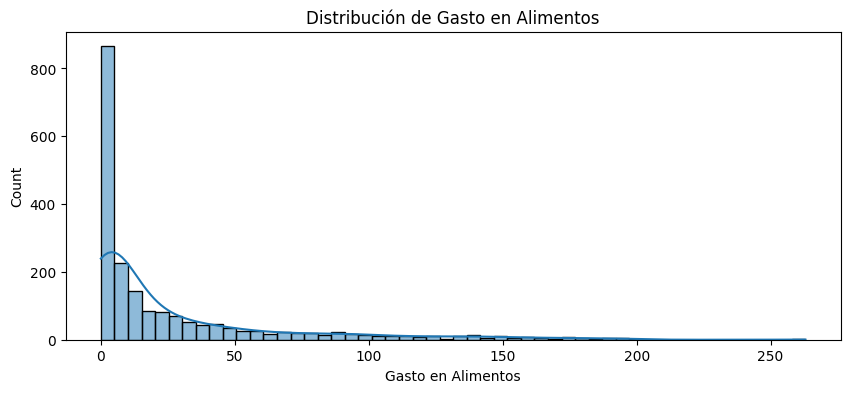

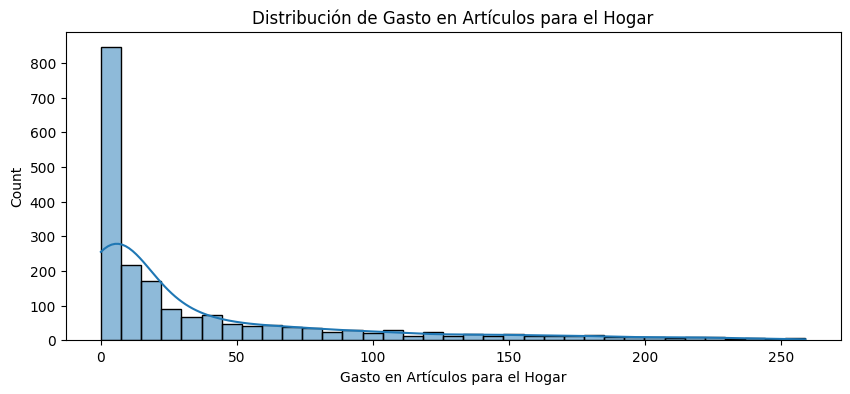

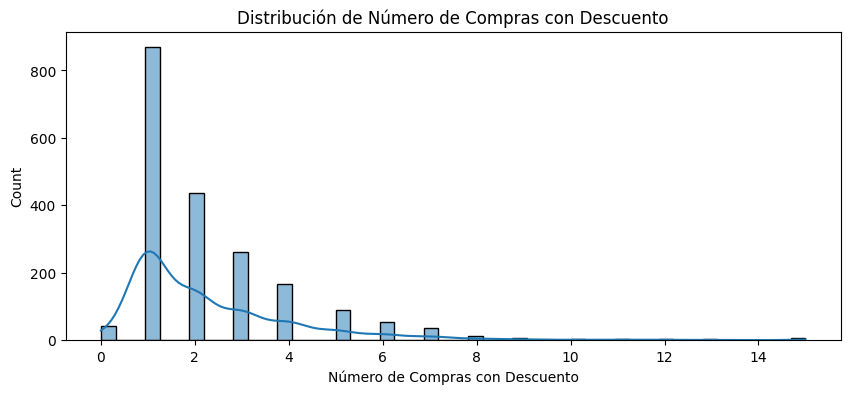

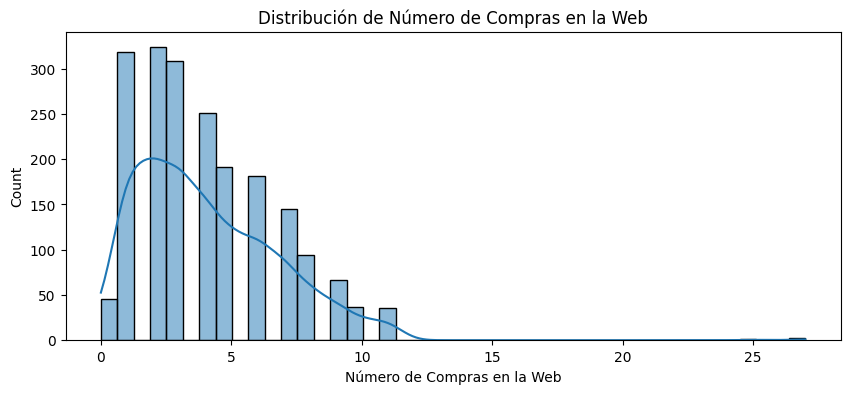

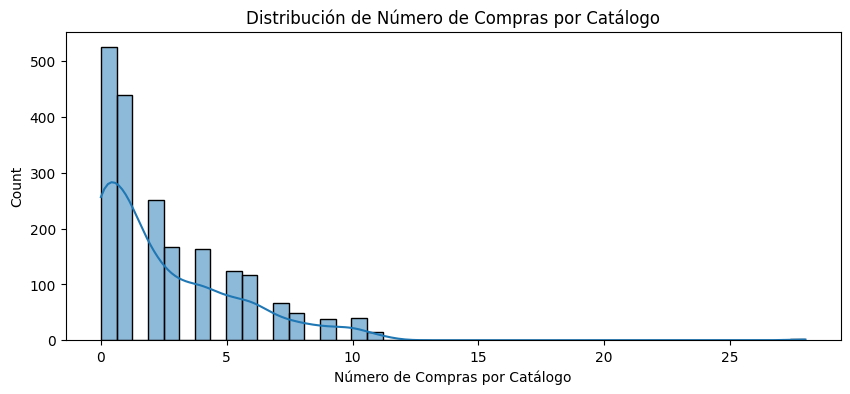

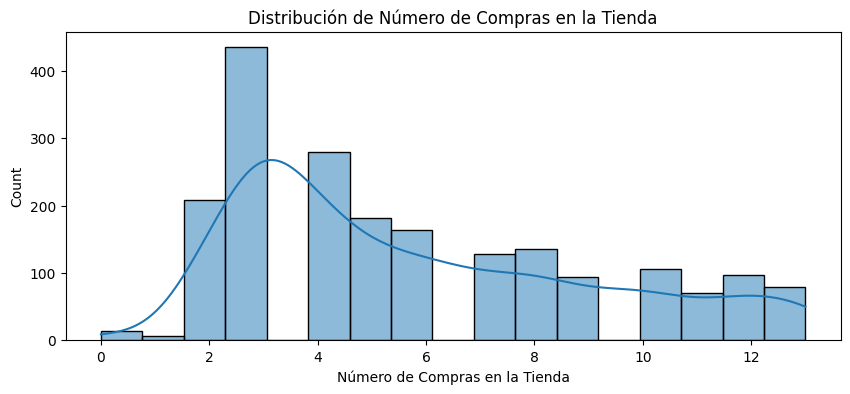

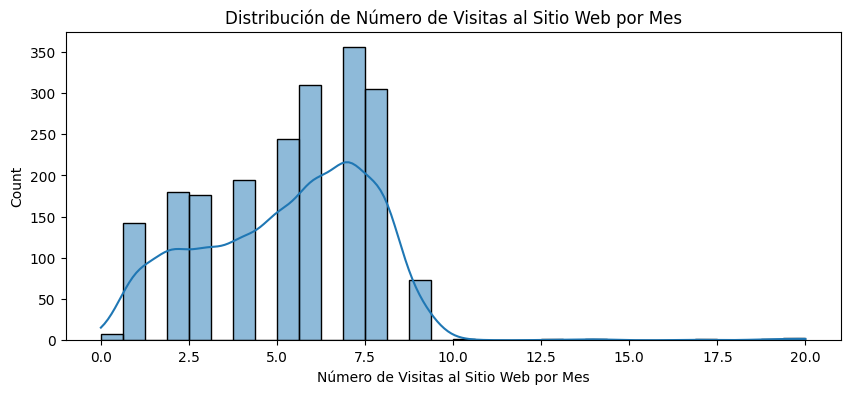

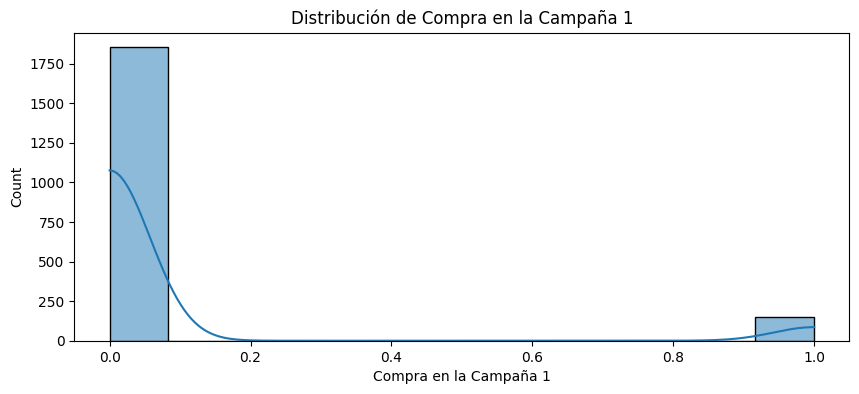

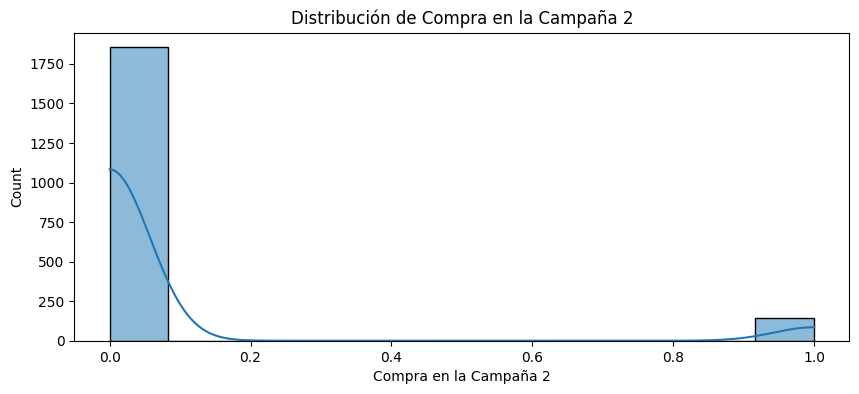

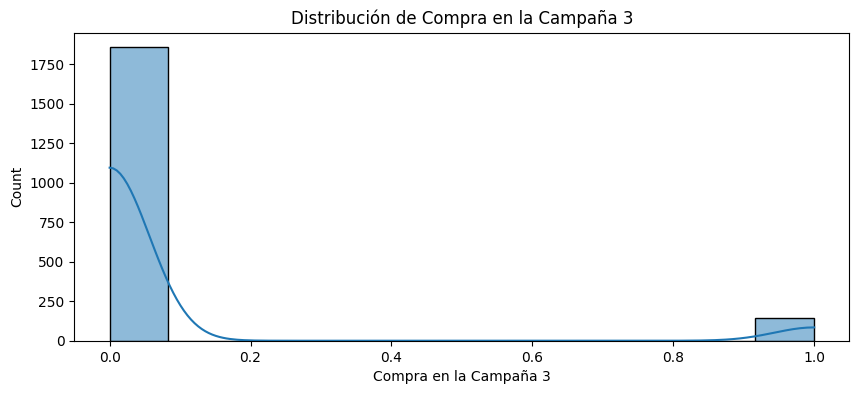

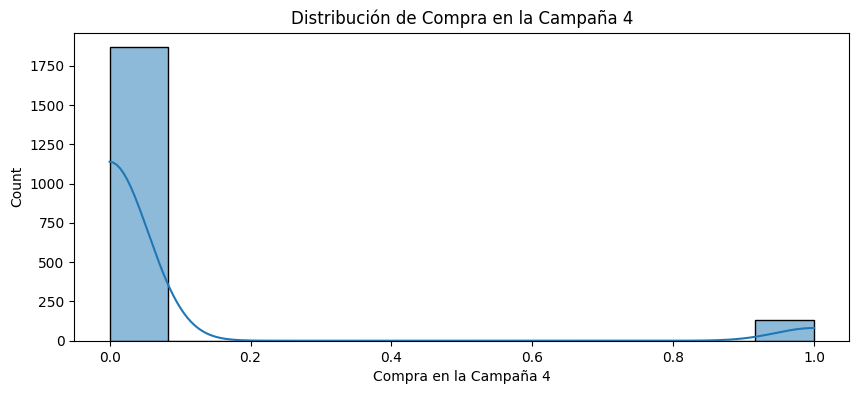

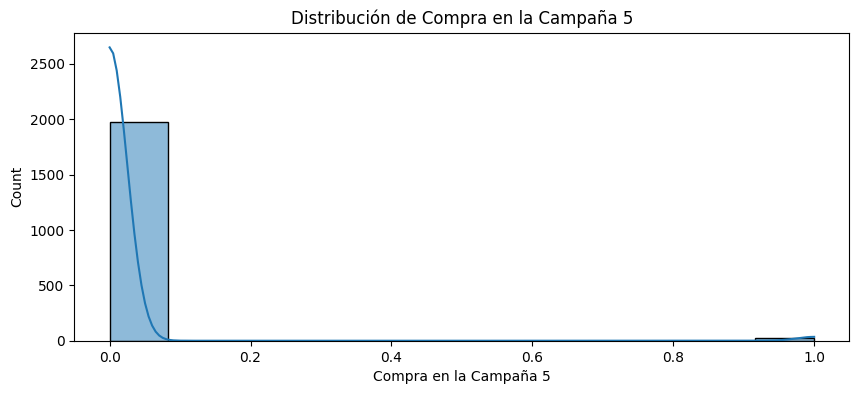

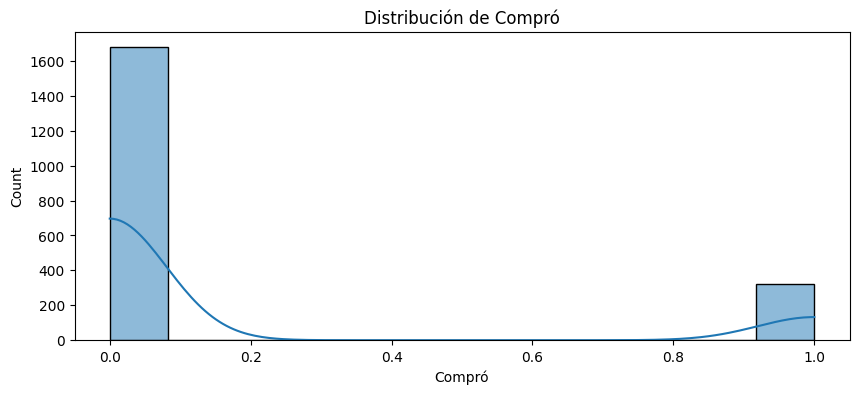

In [ ]:
# Distribución de Variables Numéricas
numeric_columns = [
    'Año de Nacimiento', 'Salario Anual', 'Niños en Casa', 'Adolescentes en Casa',
    'Días Desde la Última Compra', 'Gasto en Electrónicos', 'Gasto en Alimentos',
    'Gasto en Artículos para el Hogar', 'Número de Compras con Descuento',
    'Número de Compras en la Web', 'Número de Compras por Catálogo',
    'Número de Compras en la Tienda', 'Número de Visitas al Sitio Web por Mes',
    'Compra en la Campaña 1', 'Compra en la Campaña 2', 'Compra en la Campaña 3',
    'Compra en la Campaña 4', 'Compra en la Campaña 5', 'Compró'
]
existing_numeric_columns = [col for col in numeric_columns if col in data.columns]

for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

### Distribución de Variables Categóricas

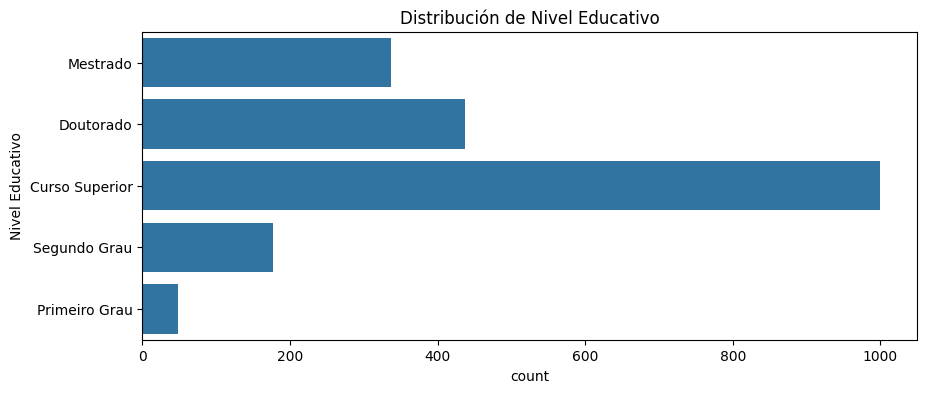

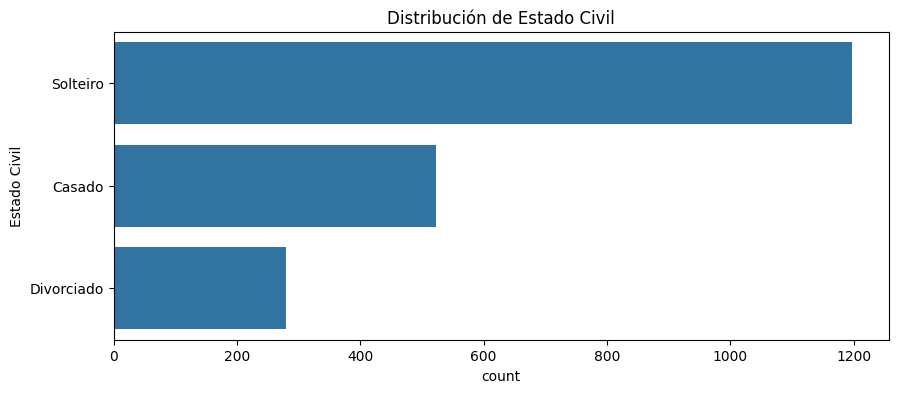

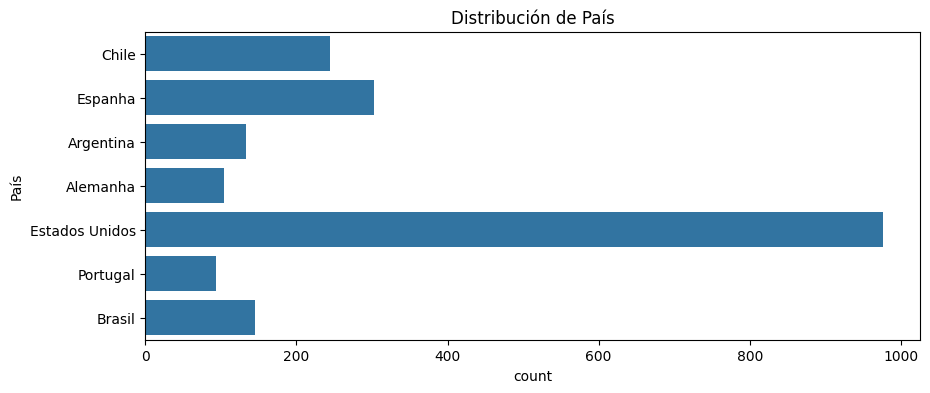

In [ ]:
categorical_columns = ['Nivel Educativo', 'Estado Civil', 'País']

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[col])
    plt.title(f'Distribución de {col}')
    plt.show()

### Visualización de Valores Faltantes

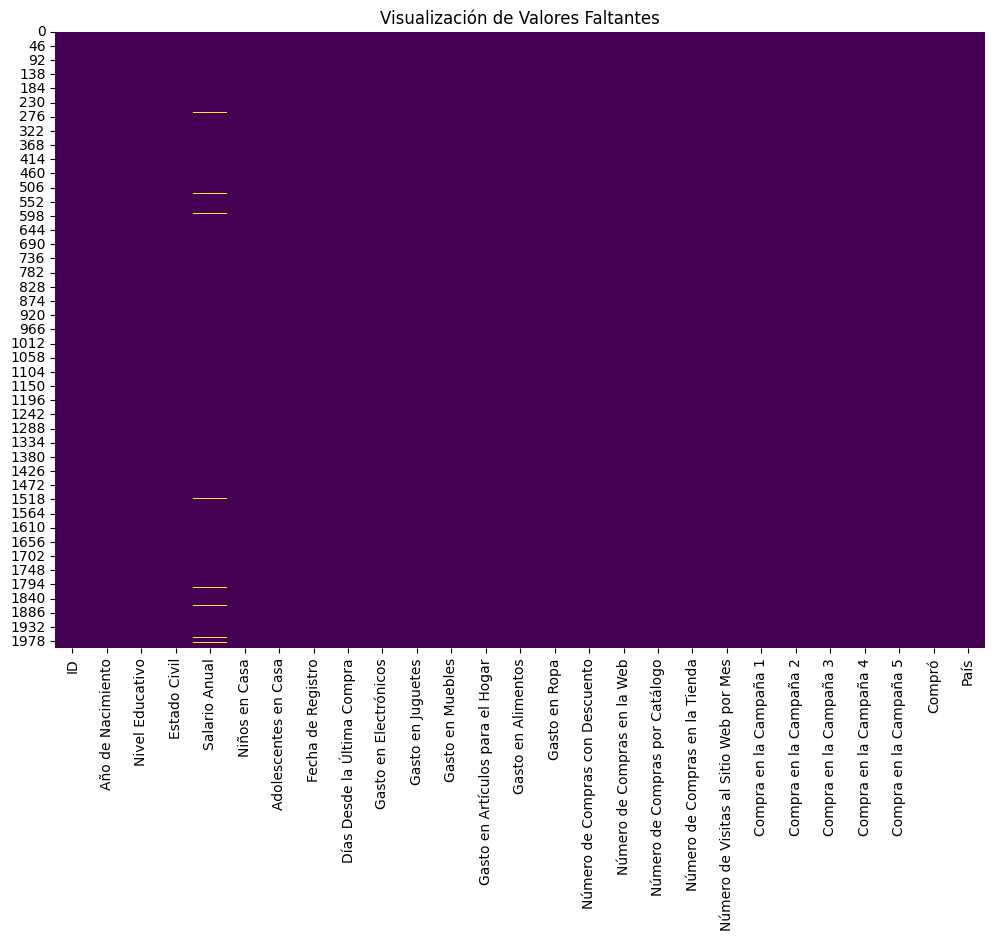

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Valores Faltantes')
plt.show()

### Correlaciones entre Variables Numéricas

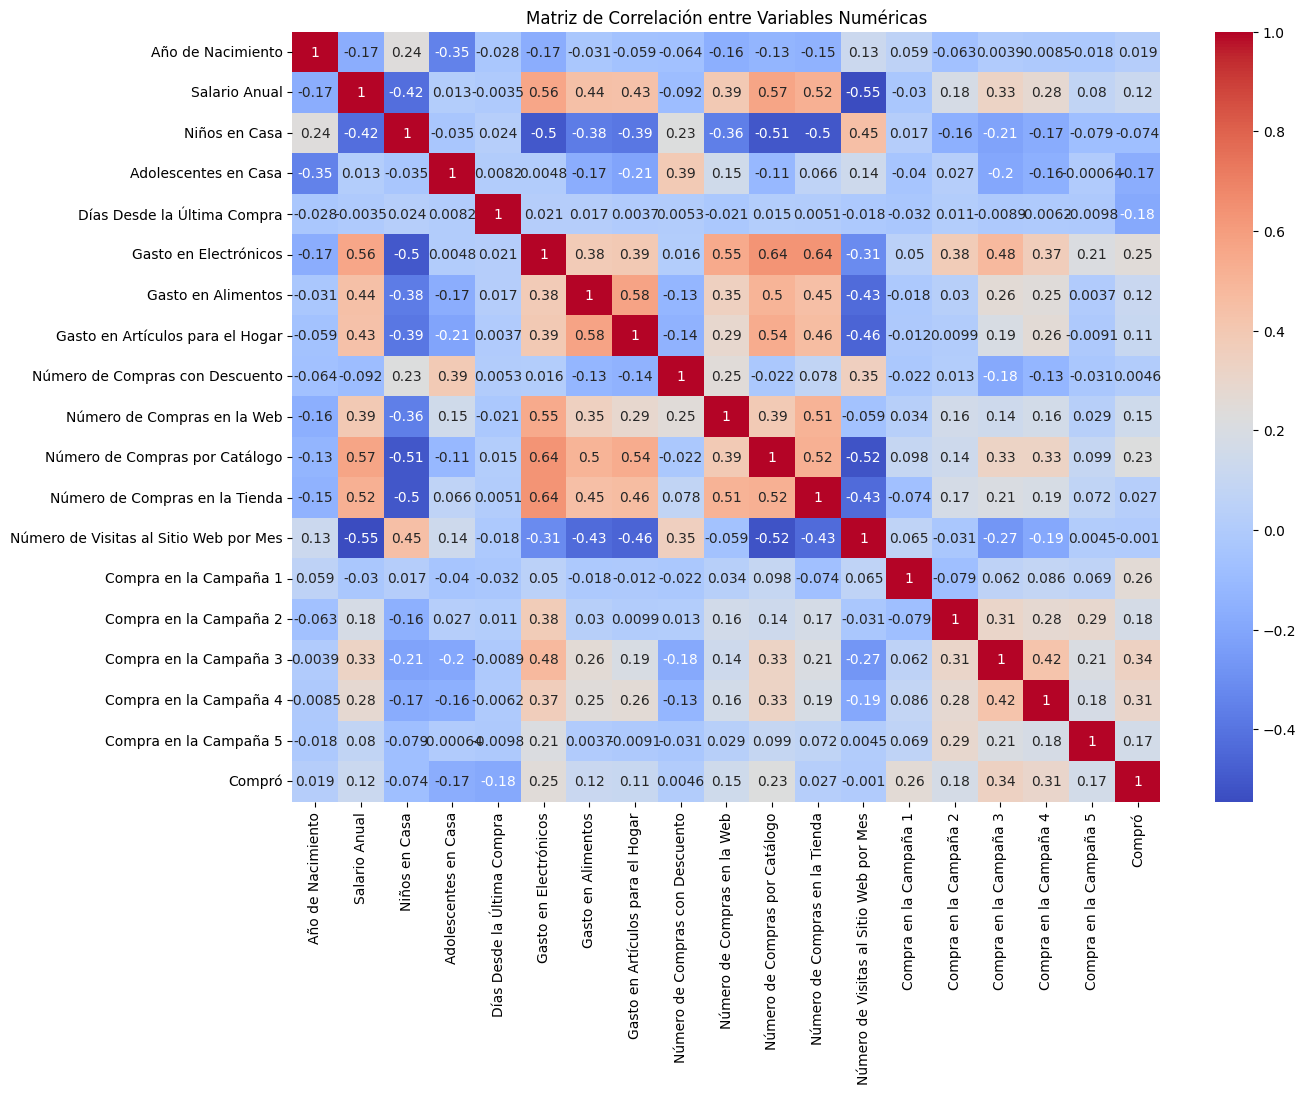

In [ ]:
plt.figure(figsize=(14, 10))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

### Distribuciones y Relaciones de Variables de Interés
#### Relación entre Salario Anual y Gasto en Electrónicos

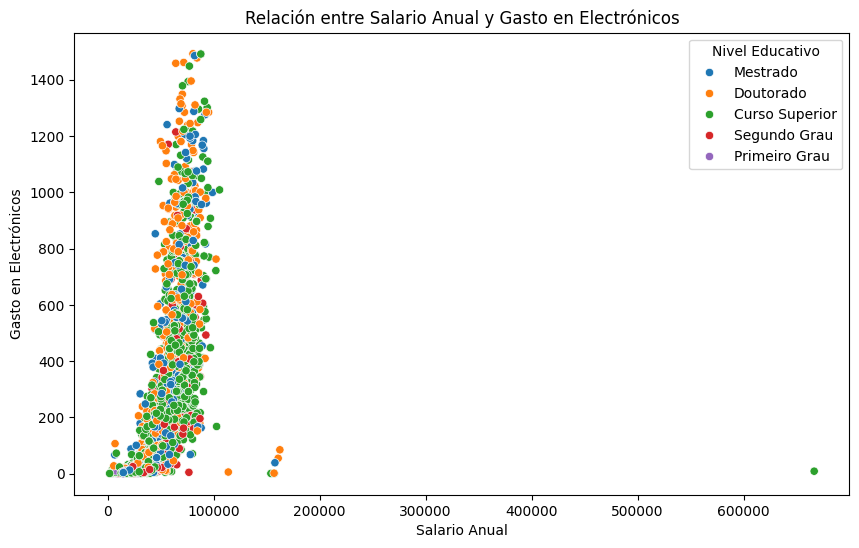

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salario Anual', y='Gasto en Electrónicos', data=data, hue='Nivel Educativo')
plt.title('Relación entre Salario Anual y Gasto en Electrónicos')
plt.show()

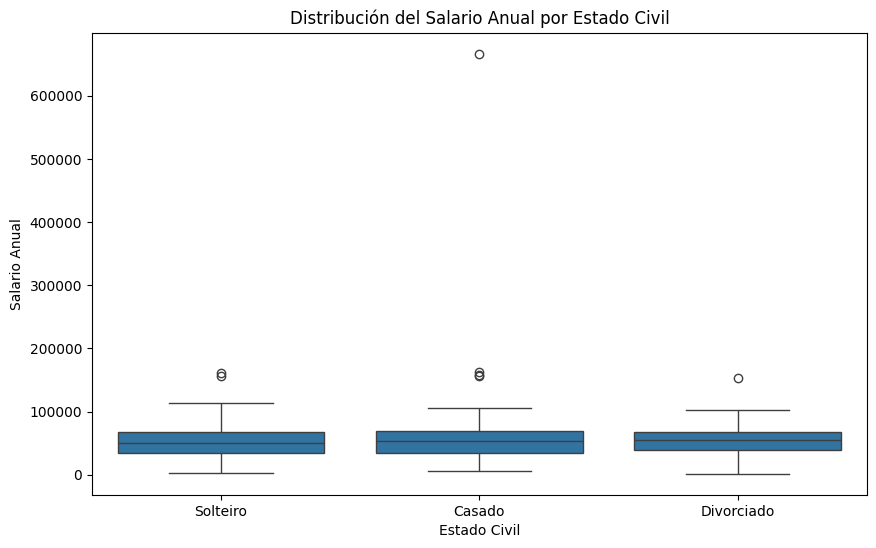

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estado Civil', y='Salario Anual', data=data)
plt.title('Distribución del Salario Anual por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Salario Anual')
plt.show()


# Preprocesamiento de datos

El preprocesamiento de los datos incluye la conversión de fechas a un formato datetime y la categorización de columnas categóricas. Se implementan pipelines específicos para el preprocesamiento de datos numéricos y categóricos, incluyendo imputación de valores faltantes y escalado de características. Para KMeans, los datos son transformados usando un ColumnTransformer que combina ambos tipos de datos. En el caso de KModes, se codifican las columnas categóricas, mientras que para KPrototypes se combinan datos numéricos escalados y categorías codificadas. Además, se emplea el algoritmo Isolation Forest para detectar y eliminar outliers. Para el clustering basado en Recency, Frequency, Monetary (RFM), se calculan y normalizan estas métricas antes de combinarlas con los demás datos en un pipeline de preprocesamiento.

In [ ]:
# Preprocesamiento de la columna de fechas y de categorías
data['Fecha de Registro'] = pd.to_datetime(data['Fecha de Registro'], format='%d/%m/%Y')
categorical_columns = ['Nivel Educativo', 'Estado Civil', 'País']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Pipelines de preprocesamiento
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])
# Preprocesamiento para KMeans
kmeans_preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, existing_numeric_columns),
    ('cat', categorical_pipeline, categorical_columns)
])
# Transformación de los datos
data_kmeans = kmeans_preprocessor.fit_transform(data)
data_kmeans_np = data_kmeans.toarray() if hasattr(data_kmeans, "toarray") else data_kmeans

# Preprocesamiento específico para KModes (Codificarlas en numero para que lo lea los indices)
kmodes_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])
data_kmodes = kmodes_preprocessor.fit_transform(data[categorical_columns])

# Preprocesamiento específico para KPrototypes
kprototypes_preprocessor_num = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
data_kprototypes_num = kprototypes_preprocessor_num.fit_transform(data[existing_numeric_columns])
data_kprototypes_cat = data[categorical_columns].apply(lambda x: x.cat.codes).to_numpy()
# Combinar datos numéricos y categóricos para KPrototypes
data_kprototypes_combined = np.hstack((data_kprototypes_num, data_kprototypes_cat))

# Preprocesamiento de datos numéricos para otros algoritmos
data_numeric = numerical_pipeline.fit_transform(data[existing_numeric_columns])
data_numeric_np = data_numeric.toarray() if hasattr(data_numeric, "toarray") else data_numeric

# Manejo de Outliers con Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(data_numeric_np)
non_outlier_indices = np.where(outliers == 1)[0]
data_cleaned = data_numeric_np[non_outlier_indices]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocesamiento de RFM con SOM

El Self-Organizing Map (SOM) utiliza las métricas RFM (Recencia, Frecuencia y Valor Monetario) para identificar patrones de comportamiento en los datos de clientes. En este proceso, primero se calcula y normaliza la Recencia (días desde la última compra), la Frecuencia (número total de compras) y el Valor Monetario (gasto total). Estas métricas normalizadas se combinan con otras características del cliente y se ingresan en el SOM, que organiza los datos en un mapa bidimensional. A través de un proceso iterativo de entrenamiento, el SOM ajusta sus nodos para representar las relaciones y similitudes entre los clientes, agrupándolos en clusters basados en sus comportamientos de compra, lo que facilita la segmentación y análisis de clientes en función de sus características RFM.

In [ ]:
# Preprocesamiento específico para RFM de SOM
# libreria para manejar Fechas de RFM
import datetime as dt

# Parámetros de referencia de fecha
fecha_referencia = dt.datetime(2024, 7, 12)

# Calcular Recencia, Frecuencia y Valor Monetario
data['Recencia'] = (fecha_referencia - data['Fecha de Registro']).dt.days
data['Frecuencia'] = data[['Número de Compras con Descuento', 'Número de Compras en la Web', 'Número de Compras por Catálogo', 'Número de Compras en la Tienda']].sum(axis=1)
data['ValorMonetario'] = data[['Gasto en Electrónicos', 'Gasto en Juguetes', 'Gasto en Muebles', 'Gasto en Artículos para el Hogar', 'Gasto en Alimentos', 'Gasto en Ropa']].sum(axis=1)

# Normalizar RFM
rfm_columns = ['Recencia', 'Frecuencia', 'ValorMonetario']
data[rfm_columns] = StandardScaler().fit_transform(data[rfm_columns])

# Agregar RFM al pipeline de preprocesamiento de datos
rfm_preprocessor = ColumnTransformer([
    ('rfm', 'passthrough', rfm_columns),
    ('num', numerical_pipeline, existing_numeric_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Transformación de los datos con RFM
data_rfm = rfm_preprocessor.fit_transform(data)
data_rfm_np = data_rfm.toarray() if hasattr(data_rfm, "toarray") else data_rfm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Reducción de dimensionalidad con PCA

La reducción de dimensionalidad con PCA se realiza para facilitar la visualización de datos multivariados en 2 dimensiones, eliminar redundancia combinando características correlacionadas, reducir el ruido enfocándose en las componentes que capturan la mayor parte de la varianza, y mejorar el rendimiento de los algoritmos de clustering al reducir la complejidad y el tiempo de cálculo. PCA transforma las características originales en nuevas características linealmente independientes, permitiendo una mejor comprensión y procesamiento de los datos.

In [ ]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
data_pca_2d = pca.fit_transform(data_cleaned)

# Definición de Funciones de Evaluación de Clustering:

Las funciones de evaluación de clustering son esenciales para medir la calidad de los clusters formados por los algoritmos. Estas funciones se definen antes de aplicar los algoritmos de clustering para asegurar que estén disponibles cuando se necesiten.

In [ ]:
# Función para evaluar modelos de clustering
# Calcula tres métricas de evaluación: el coeficiente de Silhouette, el índice de Davies-Bouldin y el índice de Calinski-Harabasz.
def evaluate_clustering(data, labels):
    if len(set(labels)) < 2:
        return -1, -1, -1  # Invalid silhouette, db index, ch score when only one cluster
    silhouette_avg = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    return silhouette_avg, db_index, ch_score

# Normalización de los índices
# Normaliza las métricas de evaluación para hacerlas comparables.
def normalize_scores(scores, max_silhouette, min_db, max_ch):
    silhouette_avg, db_index, ch_score = scores
    norm_silhouette = silhouette_avg / max_silhouette
    norm_db_index = (min_db / db_index) if db_index > 0 else 0
    norm_ch_score = ch_score / max_ch
    return norm_silhouette, norm_db_index, norm_ch_score

# Calcular los máximos y mínimos para la normalización
# Calcula los valores máximos y mínimos de las métricas de evaluación necesarias para la normalización.
def calculate_max_min_values(algorithms_scores):
    max_silhouette = max([score[0] for score in algorithms_scores.values()])
    min_db = min([score[1] for score in algorithms_scores.values()])
    max_ch = max([score[2] for score in algorithms_scores.values()])
    return max_silhouette, min_db, max_ch


# Aplicar Algoritmos de Clustering

Para evaluar diversos algoritmos de clustering, se implementaron las siguientes funciones: evaluate_kmeans utiliza el algoritmo KMeans para crear clústeres, retornando tanto la evaluación del clustering como las etiquetas de los clústeres. evaluate_kmodes y evaluate_kprototypes implementan los métodos KModes y KPrototypes, respectivamente, configurando ambos con inicialización 'Huang' y varias iteraciones. El clustering basado en SOM se evalúa con evaluate_som, que utiliza MiniSom para ajustar el modelo y obtener etiquetas de clústeres. El método PAM se evalúa con evaluate_pam, utilizando KMedoids. Para métodos jerárquicos, evaluate_agnes aplica Agglomerative Clustering, mientras que evaluate_diana utiliza linkage y fcluster. El algoritmo Birch se evalúa con evaluate_birch, que ajusta un modelo Birch para clustering. Además, se desarrolló una implementación personalizada de CLARANS en evaluate_clarans, que incluye la optimización de medoids y cálculo de distancias, retornando los clústeres y medoids finales. Finalmente, evaluate_cure implementa el algoritmo CURE utilizando PyClustering, procesando los datos y retornando las etiquetas de los clústeres.

## Cluster KMeans
KMeans es un algoritmo de clustering que agrupa datos en
K clusters, donde cada punto pertenece al cluster con el centroide más cercano, minimizando la suma de las distancias cuadradas entre los puntos y sus centroides asignados. El algoritmo comienza inicializando
K centroides, luego asigna cada punto al centroide más cercano y recalcula los centroides basándose en los puntos asignados. Este proceso se repite iterativamente hasta que los centroides convergen o el cambio entre iteraciones es mínimo.

In [ ]:
# KMeans
def evaluate_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return evaluate_clustering(data, clusters), clusters



## Cluster Kmodes

KModes es un algoritmo de clustering diseñado específicamente para datos categóricos. Similar a KMeans, agrupa los datos en K clusters, pero en lugar de usar centroides, utiliza modos, que representan las características más frecuentes en cada cluster. El algoritmo asigna cada punto al cluster cuyo modo es más similar, recalcula los modos basándose en las nuevas asignaciones, y repite este proceso hasta que los modos convergen o las asignaciones dejan de cambiar significativamente. KModes es útil para categorizar datos no numéricos, permitiendo la agrupación de observaciones en clusters basados en similitudes categóricas.

In [ ]:
# KModes
def evaluate_kmodes(data, n_clusters):
    kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)
    clusters = kmodes.fit_predict(data)
    return evaluate_clustering(data, clusters), clusters

## Cluster KPrototypes

KPrototypes es un algoritmo de clustering diseñado para trabajar con conjuntos de datos que contienen tanto variables numéricas como categóricas. A diferencia de KMeans, que solo maneja variables numéricas, y KModes, que maneja solo variables categóricas, KPrototypes combina estos enfoques para permitir la agrupación efectiva de datos mixtos. Utiliza una distancia mixta que combina la distancia euclidiana para las variables numéricas y la distancia simple de coincidencia para las variables categóricas. Este enfoque permite asignar puntos de datos a clústeres minimizando una medida de distancia combinada, y actualiza los centroides utilizando medias para las variables numéricas y modos para las variables categóricas, proporcionando así una manera robusta de segmentar datos heterogéneos.

In [ ]:
# KPrototypes
def evaluate_kprototypes(data, n_clusters):
    kprototypes = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)
    clusters = kprototypes.fit_predict(data, categorical=list(range(data.shape[1] - len(categorical_columns), data.shape[1])))
    return evaluate_clustering(data, clusters), clusters

##Cluster SOM

El Self-Organizing Map (SOM) utiliza las métricas RFM (Recencia, Frecuencia y Valor Monetario) para segmentar clientes mediante un proceso de aprendizaje no supervisado. Aquí se detalla cómo se lleva a cabo:

1. **Preparación de los Datos RFM**:
   - Se calculan las métricas RFM para cada cliente.
   - **Recencia** mide los días desde la última compra.
   - **Frecuencia** cuenta el número total de compras.
   - **Valor Monetario** suma el gasto total en diferentes categorías.
   - Estas métricas se normalizan para asegurar que cada una tenga una influencia comparable en el modelo.

2. **Configuración del SOM**:
   - El SOM se configura como una red neuronal en forma de cuadrícula bidimensional con un número determinado de nodos (clusters).
   - Cada nodo tiene un vector de pesos de la misma dimensión que los datos de entrada (en este caso, las métricas RFM normalizadas).

3. **Entrenamiento del SOM**:
   - Los datos RFM normalizados se presentan al SOM.
   - En cada iteración, el SOM selecciona un vector de entrada y encuentra el nodo cuya vector de pesos es el más similar al vector de entrada (este nodo se llama la unidad ganadora).
   - El SOM ajusta los pesos de la unidad ganadora y de sus nodos vecinos para que se parezcan más al vector de entrada.
   - Este ajuste se realiza mediante un proceso de aprendizaje competitivo y cooperativo, donde la unidad ganadora y sus vecinos "aprenden" de los datos de entrada.

4. **Clusterización**:
   - Después de muchas iteraciones, los nodos del SOM organizan y agrupan los datos de manera que los nodos cercanos en la cuadrícula representan datos de entrada similares.
   - Cada cliente se asigna al nodo del SOM más cercano a su vector de métricas RFM, creando clusters de clientes con comportamientos de compra similares.

5. **Evaluación de Clusters**:
   - Se evalúa la calidad de los clusters resultantes utilizando métricas como la puntuación de silueta, el índice de Davies-Bouldin y el índice de Calinski-Harabasz.
   - Estas métricas ayudan a determinar cuán bien se han agrupado los datos y la separación entre diferentes clusters.

6. **Visualización**:
   - Los clusters formados por el SOM se pueden visualizar en un espacio de menor dimensión (por ejemplo, utilizando PCA) para facilitar la interpretación.
   - Esto permite a los analistas de marketing ver y entender las segmentaciones de clientes basadas en las métricas RFM.

### Parámetros del SOM:

1. **Dimensiones de la Red (Grid Size)**:
   - **Número de Filas y Columnas**: Determina el tamaño de la cuadrícula bidimensional de nodos. Un tamaño mayor permite capturar más detalles, pero también requiere más tiempo de entrenamiento.

2. **Número de Iteraciones (Iterations)**:
   - **Epochs**: El número de veces que el conjunto de datos de entrada se presenta a la red. Más iteraciones permiten un mejor ajuste, pero aumentan el tiempo de entrenamiento.

3. **Tasa de Aprendizaje (Learning Rate)**:
   - **Learning Rate**: Controla cuánto se ajustan los pesos de los nodos en cada iteración. Comienza con un valor inicial y decrece con el tiempo. Un valor alto puede causar oscilaciones, mientras que un valor bajo puede resultar en una convergencia lenta.

4. **Sigma (Vecindad)**:
   - **Sigma (Neighborhood Radius)**: Determina el radio de los nodos vecinos que se ajustan en cada iteración. Similar a la tasa de aprendizaje, decrece con el tiempo. Un valor mayor al inicio ayuda a una organización global, mientras que valores menores hacia el final refinan los ajustes locales.

### Ventajas y Desventajas del SOM con RFM

### Ventajas del SOM:

1. **Visualización Intuitiva**:
   - El SOM transforma datos de alta dimensionalidad en un mapa bidimensional fácil de interpretar, facilitando la visualización de patrones y relaciones en los datos.

2. **Agrupación No Supervisada**:
   - Puede agrupar datos sin necesidad de etiquetas o supervisión previa, lo que es útil para la exploración de datos y descubrimiento de patrones.

3. **Captura de Estructuras Topológicas**:
   - Preserva la estructura topológica de los datos, es decir, datos similares en el espacio original permanecen juntos en el mapa, facilitando la identificación de clusters coherentes.

4. **Reducción de Dimensionalidad**:
   - Reduce la dimensionalidad de los datos, ayudando en la simplificación y análisis de conjuntos de datos complejos.

### Desventajas del SOM:

1. **Selección de Parámetros**:
   - Requiere una cuidadosa selección de parámetros como el tamaño de la cuadrícula, tasa de aprendizaje y sigma, los cuales pueden influir significativamente en el rendimiento y resultado del SOM.

2. **Escalabilidad**:
   - Puede ser computacionalmente costoso y lento para grandes conjuntos de datos, debido a la necesidad de múltiples iteraciones y ajustes de pesos.

3. **Determinación de Clusters**:
   - No define explícitamente el número de clusters, lo cual puede requerir análisis adicionales para identificar y etiquetar los clusters resultantes.

4. **Sensibilidad a la Inicialización**:
   - La inicialización de los pesos y la elección de parámetros pueden afectar los resultados, requiriendo a veces múltiples ejecuciones para obtener un mapa estable y confiable.

5. **Complejidad en Datos No Estructurados**:
   - Aunque es excelente para datos numéricos y estructurados, puede tener dificultades para manejar datos altamente no estructurados sin una preprocesamiento adecuado.

En resumen, el SOM es una herramienta poderosa para la visualización y agrupación de datos, especialmente útil para descubrir patrones en datos no etiquetados. Sin embargo, su efectividad depende de una adecuada selección y ajuste de sus parámetros y puede ser limitado en escalabilidad y sensibilidad a la inicialización.


In [ ]:
# RFM Clustering (SOM)
def evaluate_som(data, n_clusters, input_len):
    som = MiniSom(n_clusters, 1, input_len, sigma=1.0, learning_rate=0.5)
    som.random_weights_init(data)
    som.train_random(data, 100)
    labels = np.array([som.winner(x)[0] for x in data])
    clusters = labels
    return evaluate_clustering(data, clusters), clusters

## Cluster PAM


El algoritmo de clustering PAM (Partitioning Around Medoids) es una técnica robusta de particionamiento que selecciona objetos representativos llamados medoids en lugar de centroides como en K-means. Un medoid es un punto real del conjunto de datos cuya disimilitud media a todos los otros puntos del cluster es mínima. PAM busca minimizar la suma de las disimilitudes entre los puntos y sus medoids correspondientes. Se inicia eligiendo un conjunto inicial de medoids y luego iterativamente reemplaza uno de los medoids con un objeto no medoid si este cambio reduce el costo total de la disimilitud. PAM es particularmente útil para conjuntos de datos pequeños a medianos y es menos sensible a outliers y ruido en comparación con K-means, pero puede ser computacionalmente costoso para grandes conjuntos de datos debido a su complejidad cuadrática.

In [ ]:
# PAM
def evaluate_pam(data, n_clusters):
    pam = KMedoids(n_clusters=n_clusters, random_state=42)
    clusters = pam.fit_predict(data)
    return evaluate_clustering(data, clusters), clusters

## Cluster AGNES

El algoritmo de clustering AGNES (Agglomerative Nesting) es una técnica de agrupamiento jerárquico aglomerativo que construye una jerarquía de clusters de forma ascendente. Comienza considerando cada punto de datos como un cluster individual y luego, en cada iteración, fusiona los dos clusters más cercanos basándose en una medida de similitud o disimilitud hasta que todos los puntos se unan en un solo cluster o se alcance un número deseado de clusters. AGNES permite utilizar diferentes métodos de enlace para determinar la proximidad entre clusters, como el enlace completo, el enlace promedio o el enlace simple. Su representación gráfica a través de dendrogramas proporciona una visualización clara de la estructura de los datos y la formación de clusters en diferentes niveles de similitud. Aunque AGNES es intuitivo y útil para detectar estructuras jerárquicas en los datos, su complejidad computacional puede ser un desafío para grandes conjuntos de datos debido al cálculo repetido de distancias entre clusters.

In [ ]:
# AGNES
def evaluate_agnes(data, n_clusters, linkage_method):
    agnes = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    clusters = agnes.fit_predict(data)
    return evaluate_clustering(data, clusters), clusters

## Cluster DIANA

El algoritmo de clustering DIANA (Divisive Analysis) es una técnica de agrupamiento jerárquico divisivo que construye una jerarquía de clusters de forma descendente. A diferencia de los métodos aglomerativos, DIANA comienza con todos los puntos de datos en un solo cluster y sucesivamente divide el cluster más grande y heterogéneo en dos, basándose en la disimilitud entre los puntos de datos. Este proceso de división continua hasta que se alcancen clusters individuales o un número deseado de clusters. DIANA es útil para identificar subestructuras dentro de datos complejos y proporciona una representación clara de la jerarquía de clusters a través de dendrogramas. Sin embargo, el algoritmo puede ser computacionalmente intensivo y requiere criterios bien definidos para determinar los puntos de división óptimos, lo que puede ser un desafío en grandes conjuntos de datos. Su enfoque descendente contrasta con los métodos aglomerativos, ofreciendo una perspectiva diferente en la formación de clusters jerárquicos.


In [ ]:
# DIANA
def evaluate_diana(data, n_clusters):
    Z = linkage(data, method='ward')
    clusters = fcluster(Z, t=n_clusters, criterion='maxclust')
    return evaluate_clustering(data, clusters), clusters

## Cluster BIRCH

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) es un algoritmo de clustering diseñado para manejar grandes conjuntos de datos de manera eficiente y efectiva. Fue desarrollado para superar las limitaciones de otros algoritmos de clustering en términos de escalabilidad y consumo de memoria. Aquí se detalla cómo funciona BIRCH y sus características clave:

#### Fases del Algoritmo BIRCH

1. **Construcción del CF Tree (Cluster Feature Tree)**:
   - **Cluster Features (CF)**: Un CF es un triplete que representa un cluster y se compone de tres elementos: el número de puntos en el cluster (N), la suma de los puntos del cluster (LS, Linear Sum), y la suma de los cuadrados de los puntos del cluster (SS, Squared Sum). Estos elementos permiten calcular fácilmente las propiedades estadísticas del cluster, como la media y la desviación estándar.
   - **Nodo de CF Tree**: Un nodo en el CF Tree puede ser un nodo hoja o un nodo no hoja. Los nodos no hoja contienen referencias a nodos hijos y sus CFs agregados, mientras que los nodos hoja contienen los CFs y las entradas a los puntos de datos.
   - **Construcción Incremental**: A medida que se procesan los puntos de datos, se van insertando en el CF Tree. Si un punto puede ser absorbido por un nodo existente (es decir, el punto es suficientemente cercano al cluster representado por el nodo), el CF del nodo se actualiza. Si no, se crea un nuevo nodo o se divide el nodo existente si está lleno, siguiendo un criterio de umbral de similitud.

2. **Condensación**:
   - **Reducción del CF Tree**: Después de construir el CF Tree, se puede aplicar una etapa de condensación para reducir el tamaño del árbol. Esto implica la eliminación de nodos insignificantes y la fusión de nodos pequeños, permitiendo que el árbol se mantenga manejable y que se preserven los clusters significativos.

3. **Clustering Global**:
   - **Aplicación de Algoritmo de Clustering Final**: Una vez que el CF Tree se ha construido y posiblemente condensado, se aplica un algoritmo de clustering global (como K-means) a los nodos hoja del CF Tree. Esto permite refinar los clusters obtenidos y mejorar la precisión del clustering final.

### Parámetros del Algoritmo BIRCH

1. **Branching Factor (B)**:
   - **Descripción**: El factor de ramificación controla el número máximo de nodos hijos que puede tener un nodo en el CF Tree. Un valor mayor permite un árbol más ancho y menos profundo, mientras que un valor menor resulta en un árbol más profundo.
   - **Importancia**: Afecta la estructura y profundidad del CF Tree. Un mal ajuste puede llevar a una sobrecarga en la memoria o a un tiempo de procesamiento ineficiente.

2. **Threshold (T)**:
   - **Descripción**: El umbral determina la máxima distancia permitida entre puntos de datos para que se puedan agrupar en el mismo subcluster dentro de un nodo. Este parámetro es crucial para decidir cuándo un nuevo nodo debe ser creado en lugar de insertar un punto en un nodo existente.
   - **Importancia**: Afecta la granularidad del clustering. Un umbral muy bajo puede resultar en muchos subclusters pequeños, mientras que un umbral muy alto puede llevar a subclusters demasiado grandes y diversos.

3. **Number of Clusters (n_clusters)**:
   - **Descripción**: Indica el número de clusters deseados en el paso final de clustering. Generalmente se utiliza con un algoritmo de clustering final como K-means sobre los nodos hoja del CF Tree.
   - **Importancia**: Define el nivel de agrupación final y puede ser ajustado basado en el análisis de los clusters formados en el CF Tree.

### Ventajas y Desventajas de BIRCH

#### Ventajas de BIRCH

1. **Escalabilidad**:
   - BIRCH está diseñado para manejar grandes volúmenes de datos. El CF Tree permite que el algoritmo procese datos de manera incremental y eficiente en términos de memoria.

2. **Eficiencia**:
   - BIRCH es altamente eficiente debido a su capacidad para resumir grandes cantidades de datos en CFs compactos, reduciendo así el número de cálculos necesarios para el clustering.

3. **Capacidad Incremental**:
   - El algoritmo puede procesar datos en lotes o en tiempo real, lo que lo hace adecuado para aplicaciones donde los datos llegan de manera continua.

4. **Flexibilidad**:
   - El CF Tree permite que BIRCH maneje clusters de diferentes formas y tamaños, lo que lo hace versátil en comparación con algoritmos que asumen formas de clusters específicas.

#### Desventajas de BIRCH

1. **Sensibilidad a Parámetros**:
   - BIRCH requiere una cuidadosa selección del umbral de similitud y el tamaño de los nodos del CF Tree. Una mala elección de estos parámetros puede llevar a resultados subóptimos.

2. **Dependencia del Orden de los Datos**:
   - El resultado de BIRCH puede depender del orden en que se procesan los datos. Datos presentados en un orden diferente pueden producir un CF Tree diferente y, por lo tanto, diferentes clusters.

3. **Limitaciones en Espacios de Alta Dimensionalidad**:
   - Aunque BIRCH es eficiente en términos de memoria y tiempo de cómputo, puede tener dificultades para manejar datos en espacios de alta dimensionalidad debido a la "maldición de la dimensionalidad".

In [ ]:
# BIRCH
def evaluate_birch(data, n_clusters):
    birch = Birch(n_clusters=n_clusters)
    clusters = birch.fit_predict(data)
    return evaluate_clustering(data, clusters), clusters

### Cluster CLARANS

CLARANS (Clustering Large Applications based upon RANdomized Search) es un algoritmo de clustering diseñado para manejar grandes conjuntos de datos de manera eficiente mediante una técnica de búsqueda aleatoria. A diferencia de otros algoritmos de clustering que exploran exhaustivamente todas las posibles particiones, CLARANS realiza una búsqueda local en el espacio de soluciones para encontrar los medoids más representativos. Aquí se detalla cómo funciona CLARANS y sus características clave:

#### Fases del Algoritmo CLARANS

1. **Selección de Medoids Iniciales**:
   - **Medoids**: CLARANS comienza seleccionando un conjunto inicial de medoids de manera aleatoria. Los medoids son puntos de datos que representan los centros de los clusters.

2. **Búsqueda Local**:
   - **Iteraciones Locales**: En cada iteración, CLARANS selecciona un medoid candidato para reemplazar uno de los medoids actuales. La elección del candidato se realiza aleatoriamente dentro de una vecindad definida.
   - **Evaluación de Costo**: Se calcula el costo del nuevo conjunto de medoids, que es la suma de las disimilitudes entre cada punto y su medoid más cercano. Si el costo disminuye, el nuevo medoid reemplaza al medoid actual.
   - **Número de Vecinos Máximos**: CLARANS explora un número máximo de vecinos en cada iteración local. Si no se encuentra una mejora después de explorar este número de vecinos, el algoritmo inicia una nueva búsqueda con un nuevo conjunto de medoids iniciales.

3. **Iteraciones Globales**:
   - **Reinicio de Búsqueda**: CLARANS repite el proceso de búsqueda local varias veces, cada vez con un nuevo conjunto de medoids iniciales, para explorar diferentes áreas del espacio de soluciones.
   - **Mejor Solución**: Al finalizar todas las iteraciones, el conjunto de medoids con el menor costo se elige como la solución final.

### Parámetros del Algoritmo CLARANS

1. **Número de Clusters (k)**:
   - **Descripción**: Define el número de clusters deseados en la solución final.
   - **Importancia**: Determina el nivel de partición en el conjunto de datos y afecta directamente la estructura de los clusters.

2. **Número de Vecinos (maxneighbor)**:
   - **Descripción**: El número máximo de vecinos a explorar en cada iteración local. Este parámetro controla cuántas posibles sustituciones de medoids se consideran antes de reiniciar la búsqueda.
   - **Importancia**: Un valor mayor puede llevar a una mejor solución pero a un mayor tiempo de cómputo. Un valor menor puede acelerar el proceso pero con el riesgo de converger a una solución subóptima.

3. **Número de Búsquedas Locales (numlocal)**:
   - **Descripción**: El número de veces que se reinicia la búsqueda con un nuevo conjunto de medoids iniciales.
   - **Importancia**: Afecta la capacidad del algoritmo para explorar diferentes áreas del espacio de soluciones y evitar mínimos locales.

### Ventajas y Desventajas de CLARANS

#### Ventajas de CLARANS

1. **Escalabilidad**:
   - CLARANS está diseñado para manejar grandes volúmenes de datos de manera eficiente, superando las limitaciones de algoritmos que requieren exploraciones exhaustivas.

2. **Eficiencia**:
   - Al realizar una búsqueda aleatoria en lugar de una búsqueda exhaustiva, CLARANS puede encontrar buenos clusters en menos tiempo, especialmente en conjuntos de datos grandes.

3. **Flexibilidad**:
   - Puede adaptarse a diferentes estructuras de datos y no está restringido por la forma o tamaño de los clusters, lo que lo hace versátil para diversas aplicaciones.

#### Desventajas de CLARANS

1. **Sensibilidad a Parámetros**:
   - La efectividad de CLARANS depende de una adecuada elección de los parámetros como el número de vecinos y el número de búsquedas locales. Una mala elección puede llevar a resultados subóptimos.

2. **Dependencia de Aleatoriedad**:
   - Debido a su naturaleza aleatoria, los resultados pueden variar entre ejecuciones. Esto puede requerir múltiples ejecuciones para asegurar una solución estable.

3. **Complejidad Computacional**:
   - Aunque es más eficiente que las búsquedas exhaustivas, CLARANS todavía puede ser computacionalmente intensivo para muy grandes conjuntos de datos debido a la necesidad de calcular disimilitudes repetidamente.

In [ ]:
# Implementar CLARANS
class CustomCLARANS:
    def __init__(self, data, number_clusters, numlocal, maxneighbor):
        self.data = data
        self.number_clusters = number_clusters
        self.numlocal = numlocal
        self.maxneighbor = maxneighbor

    def calculate_distances(self, data, medoids):
        return pairwise_distances(data, data[medoids], metric='euclidean')

    def work(self, medoids, data, num_points, maxneighbor):
        cost = float('inf')
        improving = True
        while improving:
            improving = False
            clusters = {medoid: [] for medoid in medoids}
            all_distances = self.calculate_distances(data, medoids)
            assigned_medoids = np.argmin(all_distances, axis=1)
            for idx, medoid in enumerate(medoids):
                clusters[medoid] = np.where(assigned_medoids == idx)[0]

            new_cost = np.sum(np.min(all_distances, axis=1))

            if new_cost < cost:
                cost = new_cost
                improving = True

            for _ in range(maxneighbor):
                new_medoids = medoids[:]
                to_replace = random.choice(new_medoids)
                candidate = random.randint(0, num_points - 1)
                while candidate in new_medoids:
                    candidate = random.randint(0, num_points - 1)
                new_medoids[new_medoids.index(to_replace)] = candidate

                new_all_distances = self.calculate_distances(data, new_medoids)
                new_assigned_medoids = np.argmin(new_all_distances, axis=1)
                new_clusters = {new_medoid: np.where(new_assigned_medoids == idx)[0] for idx, new_medoid in enumerate(new_medoids)}

                new_cost = np.sum(np.min(new_all_distances, axis=1))

                if new_cost < cost:
                    medoids = new_medoids
                    clusters = new_clusters
                    cost = new_cost
                    improving = True

        return clusters, medoids, cost

    def process(self):
        num_points = len(self.data)
        if num_points < self.number_clusters:
            raise ValueError("El tamaño de la muestra es menor que el número de clusters.")

        medoids_list = [random.sample(range(num_points), self.number_clusters) for _ in range(self.numlocal)]
        results = [self.work(medoids, self.data, num_points, self.maxneighbor) for medoids in medoids_list]

        best_cost = float('inf')
        best_clusters = None
        best_medoids = None
        for clusters, medoids, cost in results:
            if cost < best_cost:
                best_cost = cost
                best_clusters = clusters
                best_medoids = medoids

        return best_clusters, best_medoids, best_cost

def evaluate_clarans(data, num_clusters, numlocal=30, maxneighbor=100):
    clarans_instance = CustomCLARANS(data, number_clusters=num_clusters, numlocal=numlocal, maxneighbor=maxneighbor)
    clusters, medoids, cost = clarans_instance.process()

    cluster_labels = np.zeros(len(data))
    for medoid, points in clusters.items():
        for point in points:
            cluster_labels[point] = medoid

    return evaluate_clustering(data, cluster_labels), cluster_labels

### Cluster CURE

CURE (Clustering Using Representatives) es un algoritmo de clustering diseñado para manejar grandes conjuntos de datos y encontrar clusters con diferentes formas y tamaños. A diferencia de otros métodos que asumen formas esféricas para los clusters, CURE puede detectar clusters no esféricos al utilizar múltiples puntos representativos para describir cada cluster. Aquí se detalla cómo funciona CURE y sus características clave:

#### Fases del Algoritmo CURE

1. **Selección de Puntos Representativos**:
   - **Selección Aleatoria**: Inicialmente, se seleccionan aleatoriamente un número fijo de puntos representativos de cada cluster.
   - **Reducción y Compresión**: Los puntos representativos seleccionados se reducen hacia el centro del cluster por una fracción determinada, lo que ayuda a controlar la forma y tamaño del cluster.

2. **Fase de Agrupamiento Inicial**:
   - **Agrupamiento Jerárquico**: Los puntos de datos se agrupan jerárquicamente utilizando un método de enlace (como enlace simple, completo o promedio) hasta que se alcance un número predefinido de clusters.
   - **Uso de Puntos Representativos**: En lugar de utilizar un solo centroide, cada cluster se representa mediante varios puntos que se utilizan para calcular las distancias y determinar las fusiones de clusters.

3. **Asignación de Clusters**:
   - **Clustering Final**: Después de que los clusters iniciales se hayan formado, se puede aplicar un algoritmo de clustering adicional, como K-means, para refinar y mejorar la precisión de los clusters finales.

### Parámetros del Algoritmo CURE

1. **Número de Clusters (k)**:
   - **Descripción**: Indica el número de clusters deseados en la solución final.
   - **Importancia**: Define el nivel de partición final en el conjunto de datos y afecta directamente la estructura de los clusters.

2. **Número de Puntos Representativos (n_rep)**:
   - **Descripción**: El número de puntos representativos utilizados para describir cada cluster. Más puntos permiten una descripción más precisa de clusters no esféricos.
   - **Importancia**: Afecta la capacidad del algoritmo para capturar la forma y tamaño de los clusters. Un número insuficiente puede llevar a una descripción pobre del cluster, mientras que demasiados puntos pueden aumentar la complejidad computacional.

3. **Factor de Compresión (alpha)**:
   - **Descripción**: La fracción por la cual los puntos representativos se reducen hacia el centro del cluster.
   - **Importancia**: Afecta la forma final del cluster. Un valor de compresión adecuado es crucial para equilibrar la representación de la forma del cluster y la distancia entre clusters.

### Ventajas y Desventajas de CURE

#### Ventajas de CURE

1. **Capacidad para Detectar Clusters No Esféricos**:
   - A diferencia de muchos algoritmos que asumen clusters esféricos, CURE puede manejar clusters con formas arbitrarias gracias al uso de múltiples puntos representativos.

2. **Robustez Frente a Outliers**:
   - La selección de múltiples puntos representativos hace que CURE sea más robusto frente a outliers y datos ruidosos.

3. **Escalabilidad**:
   - Diseñado para manejar grandes conjuntos de datos, CURE utiliza técnicas eficientes para seleccionar y procesar puntos representativos, lo que lo hace adecuado para aplicaciones de gran escala.

#### Desventajas de CURE

1. **Complejidad Computacional**:
   - Aunque CURE es más escalable que algunos métodos jerárquicos tradicionales, sigue siendo computacionalmente intensivo debido al cálculo repetido de distancias y la gestión de múltiples puntos representativos.

2. **Sensibilidad a Parámetros**:
   - La efectividad de CURE depende de la correcta selección del número de puntos representativos y el factor de compresión. Una mala elección de estos parámetros puede llevar a resultados subóptimos.

3. **Dependencia del Orden de los Datos**:
   - Similar a otros algoritmos de clustering, los resultados de CURE pueden variar dependiendo del orden en que se procesan los datos, requiriendo posibles ajustes y pruebas adicionales.

### Conclusión

CURE es un algoritmo de clustering potente y flexible que supera muchas de las limitaciones de los métodos tradicionales al manejar clusters de formas y tamaños diversos. Su uso de múltiples puntos representativos permite detectar estructuras de clusters complejas, ofreciendo una robustez mejorada frente a outliers. Sin embargo, su implementación y efectividad dependen de la adecuada selección de parámetros y puede ser computacionalmente intensivo para muy grandes conjuntos de datos. A pesar de estas desventajas, CURE sigue siendo una herramienta valiosa para aplicaciones de clustering en entornos de datos complejos y variados.

In [ ]:
# Implementar CURE utilizando PyClustering
def evaluate_cure(data, k, n_rep, alpha):
    cure_instance = cure(data.tolist(), k, number_represent_points=n_rep, compression=alpha)
    (ticks, result) = timedcall(cure_instance.process)

    clusters = cure_instance.get_clusters()
    cluster_labels = np.zeros(len(data))
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            cluster_labels[index] = cluster_id

    return evaluate_clustering(data, cluster_labels), cluster_labels

# Evaluacion y Comparacion de Algoritmos

Se realiza una búsqueda exhaustiva de parámetros para evaluar algoritmos de clustering utilizando múltiples métricas de evaluación. Inicialmente, define funciones para normalizar las puntuaciones de los índices Silhouette, Davies-Bouldin y Calinski-Harabasz, permitiendo una comparación equitativa de las diferentes configuraciones de parámetros. Luego, se emplea ParameterGrid de sklearn para generar todas las combinaciones posibles de parámetros y evaluar el rendimiento del algoritmo de clustering seleccionado. Las puntuaciones resultantes se almacenan y normalizan, y se calcula una puntuación compuesta que integra las métricas de evaluación normalizadas. Finalmente, se identifica la mejor combinación de parámetros basada en la puntuación compuesta más alta. Este proceso asegura una optimización efectiva del algoritmo de clustering, mejorando la precisión y la calidad del modelo resultante.

In [ ]:
import numpy as np
from sklearn.model_selection import ParameterGrid

def normalize_scores(scores, max_silhouette, min_db, max_db, max_ch):
    silhouette_score, db_score, ch_score = scores

    # Normalizar el índice de Silhouette
    norm_silhouette = (silhouette_score - 0) / (max_silhouette - 0)

    # Invertir y normalizar el índice de Davies-Bouldin (valores más bajos son mejores)
    inverted_db = 1 / db_score
    norm_db = (inverted_db - (1 / max_db)) / (1 / min_db - (1 / max_db))

    # Normalizar el índice de Calinski-Harabasz
    norm_ch = (ch_score - 0) / (max_ch - 0)

    return norm_silhouette, norm_db, norm_ch

def calculate_max_min_values(scores_dict):
    silhouettes = [scores[0] for scores in scores_dict.values()]
    db_indices = [scores[1] for scores in scores_dict.values()]
    ch_scores = [scores[2] for scores in scores_dict.values()]

    max_silhouette = max(silhouettes)
    min_db = min(db_indices)
    max_db = max(db_indices)
    max_ch = max(ch_scores)

    return max_silhouette, min_db, max_db, max_ch

def grid_search_evaluate_clustering(data, algorithm, param_grid):
    best_params = None
    best_score = -np.inf
    scores_dict = {}

    for params in ParameterGrid(param_grid):
        params_str = str(params)  # Convertir los parámetros a una cadena para usarlos como clave en el diccionario
        if algorithm == 'kmeans':
            scores, clusters = evaluate_kmeans(data, params['n_clusters'])
        elif algorithm == 'kmodes':
            scores, clusters = evaluate_kmodes(data, params['n_clusters'])
        elif algorithm == 'kprototypes':
            scores, clusters = evaluate_kprototypes(data, params['n_clusters'])
        elif algorithm == 'som':
            scores, clusters = evaluate_som(data, params['n_clusters'], data.shape[1])
        elif algorithm == 'pam':
            scores, clusters = evaluate_pam(data, params['n_clusters'])
        elif algorithm == 'agnes':
            scores, clusters = evaluate_agnes(data, params['n_clusters'], params['linkage'])
        elif algorithm == 'diana':
            scores, clusters = evaluate_diana(data, params['n_clusters'])
        elif algorithm == 'birch':
            scores, clusters = evaluate_birch(data, params['n_clusters'])
        elif algorithm == 'clarans':
            scores, clusters = evaluate_clarans(data, params['n_clusters'], params['numlocal'], params['maxneighbor'])
        elif algorithm == 'cure':
            scores, clusters = evaluate_cure(data, params['k'], params['n_rep'], params['alpha'])

        silhouette_avg, db_index, ch_score = scores
        scores_dict[params_str] = (silhouette_avg, db_index, ch_score)

    max_silhouette, min_db, max_db, max_ch = calculate_max_min_values(scores_dict)
    best_composite_score = -np.inf

    for params_str, scores in scores_dict.items():
        norm_silhouette, norm_db, norm_ch = normalize_scores(scores, max_silhouette, min_db, max_db, max_ch)
        composite_score = norm_silhouette + norm_db + norm_ch
        scores_dict[params_str] += (composite_score,)

        if composite_score > best_composite_score:
            best_composite_score = composite_score
            best_params = params_str

    return best_params, best_composite_score, scores_dict

El propósito de definir estos parámetros es realizar una búsqueda exhaustiva sobre una variedad de configuraciones para cada algoritmo de clustering. Al hacerlo, se puede determinar qué combinación de parámetros produce el mejor rendimiento según las métricas de evaluación seleccionadas. Esta búsqueda sistemática garantiza que se exploren múltiples configuraciones y que se pueda identificar la más óptima para los datos en cuestión.

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grids = {
    'kmeans': {'n_clusters': [2, 3, 4]},
    'kmodes': {'n_clusters': [2, 3, 4]},
    'kprototypes': {'n_clusters': [2, 3, 4]},
    'som': {'n_clusters': [2, 3, 4]},
    'pam': {'n_clusters': [2, 3, 4]},
    'agnes': {'n_clusters': [2, 3, 4], 'linkage': ['ward', 'complete', 'average']},
    'diana': {'n_clusters': [2, 3, 4]},
    'birch': {'n_clusters': [2, 3, 4]},
    'clarans': {'n_clusters': [2, 3, 4], 'numlocal': [30, 40], 'maxneighbor': [100, 200]},
    'cure': {'k': [2, 3, 4], 'n_rep': [10, 20], 'alpha': [0.3, 0.5]},
}

El propósito de esta parte es realizar una búsqueda en cuadrícula (grid search) para identificar los mejores parámetros para diferentes algoritmos de clustering, evaluando cada combinación de parámetros para seleccionar la que ofrece el mejor rendimiento según una puntuación compuesta. Para cada algoritmo en param_grids, se llama a la función grid_search_evaluate_clustering con los datos y el conjunto de parámetros correspondientes. Los resultados se almacenan en los diccionarios best_params, best_scores y scores_comparison, los cuales contienen los mejores parámetros encontrados, las mejores puntuaciones compuestas y las comparaciones de puntuaciones, respectivamente. El código se asegura de utilizar el conjunto de datos adecuado para cada algoritmo y finalmente imprime la mejor puntuación compuesta obtenida para cada uno.

In [ ]:
# Realizar la búsqueda en cuadrícula para cada algoritmo
best_params = {}
best_scores = {}
scores_comparison = {}

for algorithm, param_grid in param_grids.items():
    if algorithm == 'kmodes':
        best_params[algorithm], best_scores[algorithm], scores_comparison[algorithm] = grid_search_evaluate_clustering(data_kmodes, algorithm, param_grid)
    elif algorithm == 'kprototypes':
        best_params[algorithm], best_scores[algorithm], scores_comparison[algorithm] = grid_search_evaluate_clustering(data_kprototypes_combined, algorithm, param_grid)
    elif algorithm == 'kmeans':
        best_params[algorithm], best_scores[algorithm], scores_comparison[algorithm] = grid_search_evaluate_clustering(data_kmeans_np, algorithm, param_grid)
    elif algorithm == 'som':
        best_params[algorithm], best_scores[algorithm], scores_comparison[algorithm] = grid_search_evaluate_clustering(data_rfm_np, algorithm, param_grid)
    else:
        best_params[algorithm], best_scores[algorithm], scores_comparison[algorithm] = grid_search_evaluate_clustering(data_cleaned, algorithm, param_grid)

    print(f"\nMejores Parámetros {algorithm}:", best_params[algorithm])
    print(f"Mejor Puntuación Compuesta {algorithm}:", best_scores[algorithm])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mejor Puntuación Compuesta kmeans: 3.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 130, cost: 4634.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4606.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 376, cost: 4624.0
Run 3, iteration: 2/100, moves: 119, cost: 4624.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 260, cost: 4457.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 303, cost: 4454.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 499, cost: 4115.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves:

/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


Mejor Puntuación Compuesta som: 3.0
Mejor Puntuación Compuesta pam: 3.0
Mejor Puntuación Compuesta agnes: 2.089049242460039
Mejor Puntuación Compuesta diana: 3.0
Mejor Puntuación Compuesta birch: 2.9983413010526405
Mejor Puntuación Compuesta clarans: 3.0
Mejor Puntuación Compuesta cure: 3.0


Visualización de los clusters

Se define la función plot_clusters, que crea gráficos de dispersión de los datos agrupados, mostrando cada grupo con diferentes colores. Luego, recorre una lista de los mejores parámetros para distintos métodos de agrupamiento (como KMeans, KModes, KPrototypes, entre otros), calcula los grupos usando estos parámetros óptimos y visualiza los resultados en el espacio PCA utilizando la función plot_clusters. En resumen, el código agrupa datos con varios métodos y visualiza los resultados para comparar cómo se formaron los grupos.

In [ ]:
# Visualización de los clusters con los mejores parámetros
def plot_clusters(data, clusters, title):
    pca_df_filtered = pd.DataFrame(data, columns=['PC1', 'PC2'])  # Crear un DataFrame directamente de los datos transformados con PCA
    pca_df_filtered['Cluster'] = clusters  # Asignar los clusters directamente
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_filtered, palette='viridis')
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


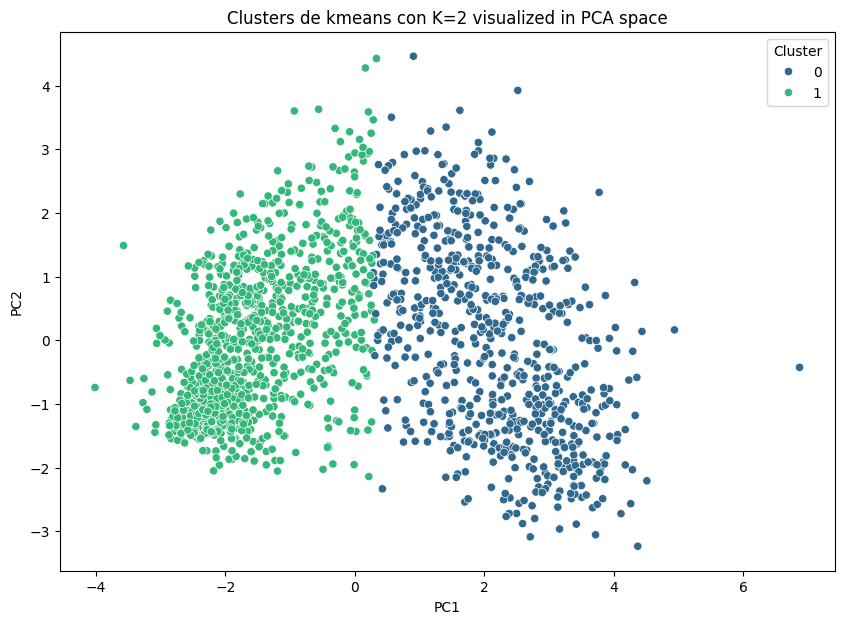

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 277, cost: 3731.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 177, cost: 3578.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 371, cost: 3699.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 233, cost: 3854.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 685, cost: 3651.0
Best run was number 2


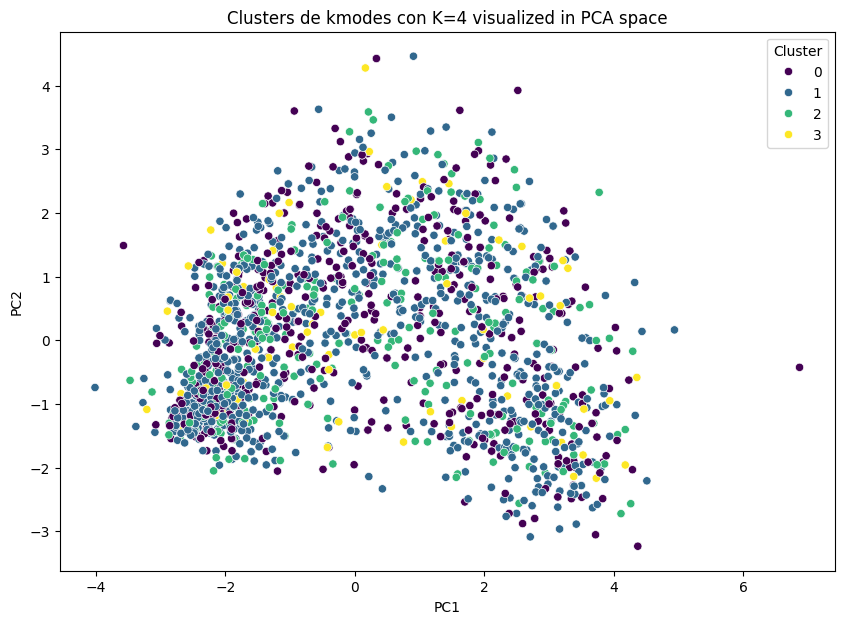

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 289, ncost: 31392.51637675301
Run: 1, iteration: 2/100, moves: 45, ncost: 31360.344352724
Run: 1, iteration: 3/100, moves: 14, ncost: 31358.26867758561
Run: 1, iteration: 4/100, moves: 3, ncost: 31358.118583463718
Run: 1, iteration: 5/100, moves: 0, ncost: 31358.118583463718
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 681, ncost: 31670.684442712707
Run: 2, iteration: 2/100, moves: 159, ncost: 31396.688422312476
Run: 2, iteration: 3/100, moves: 52, ncost: 31360.413022569835
Run: 2, iteration: 4/100, moves: 14, ncost: 31358.26867758562
Run: 2, iteration: 5/100, moves: 3, ncost: 31358.118583463718
Run: 2, iteration: 6/100, moves: 0, ncost: 31358.118583463718
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 544, ncost: 31894.474807587114
Run: 3, it

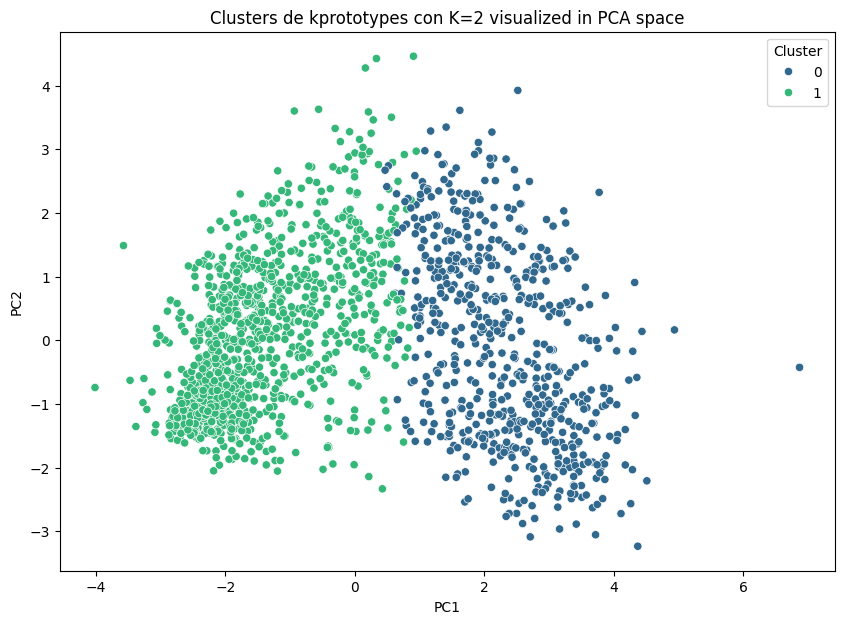

/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


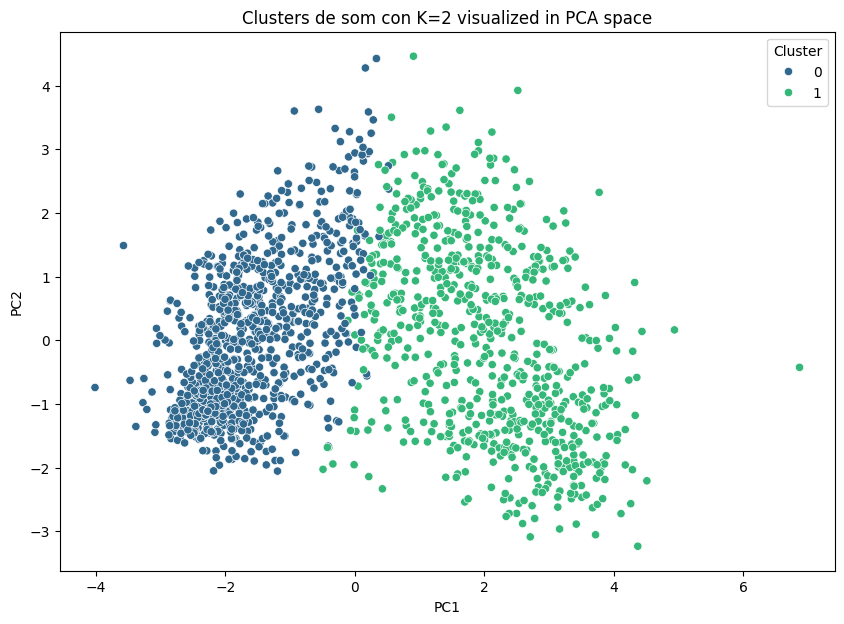

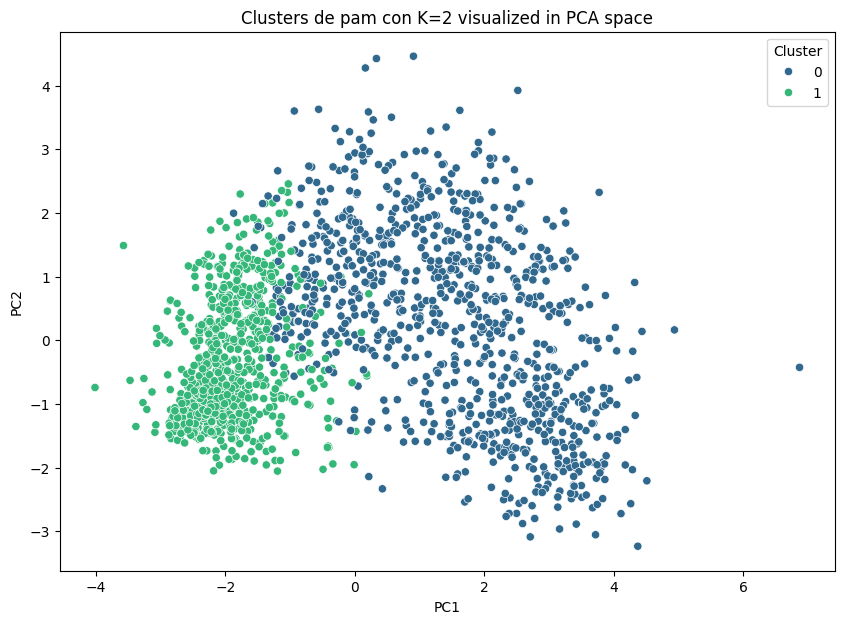

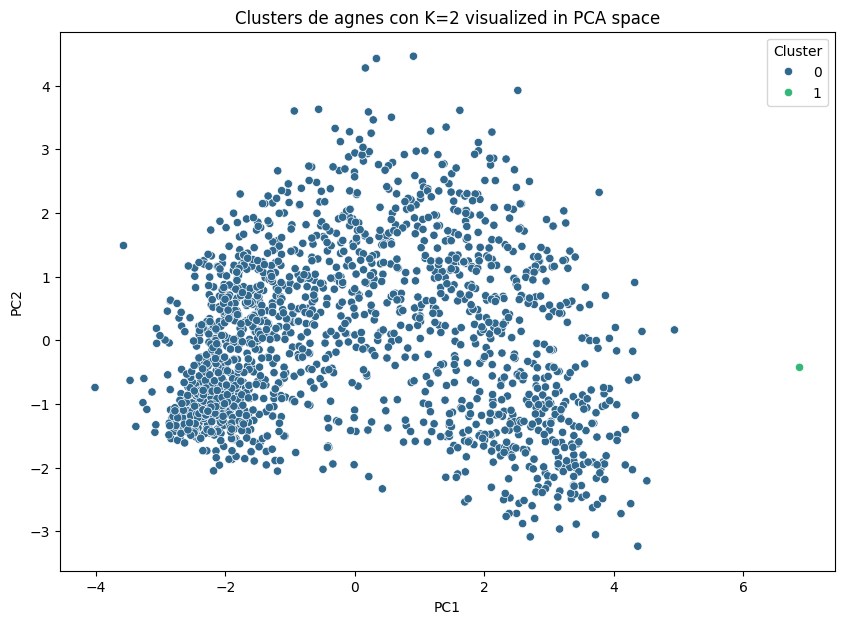

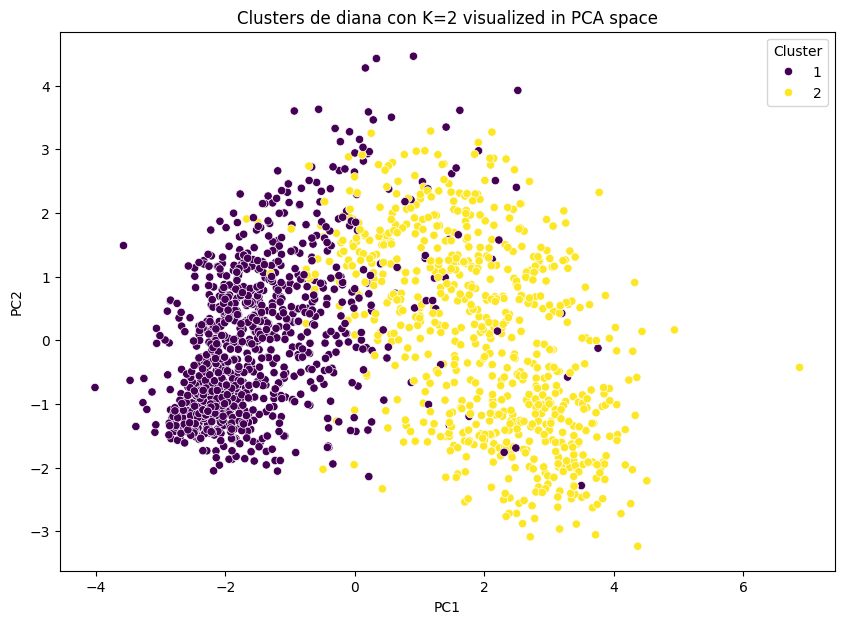

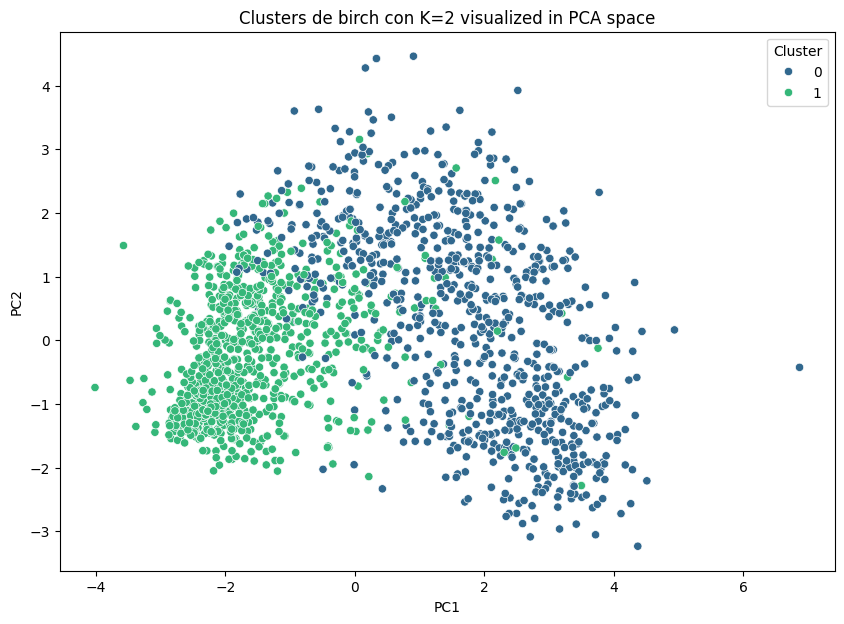

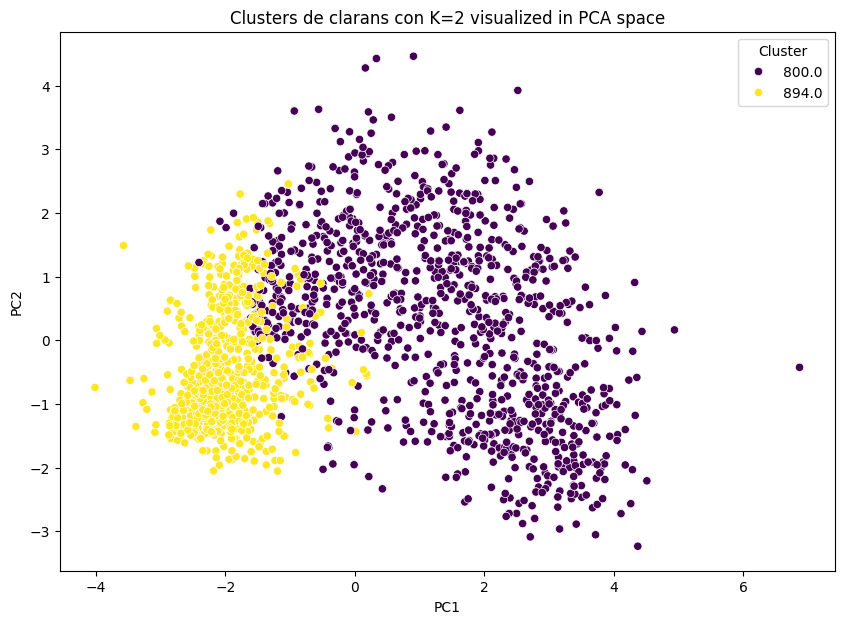

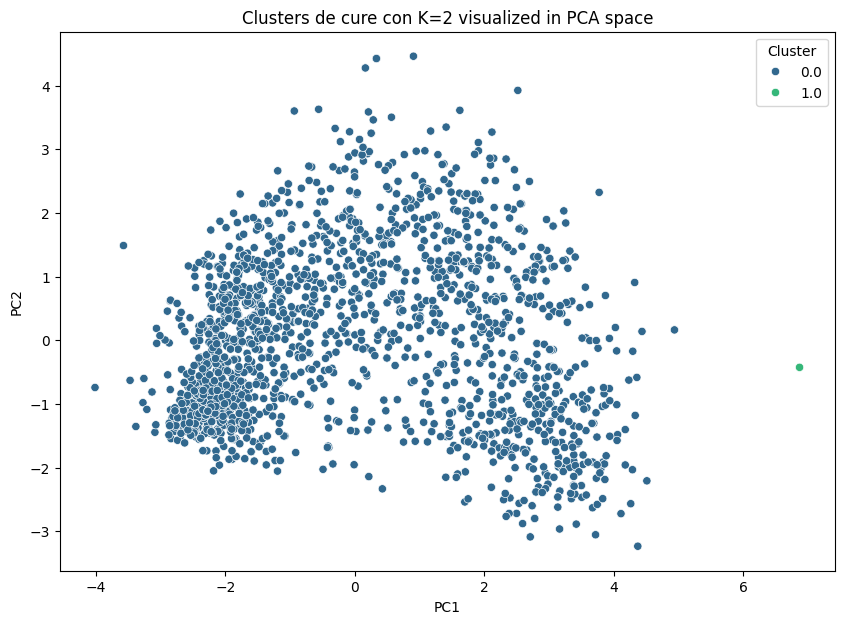

In [ ]:
# Evaluación y visualización con los mejores parámetros
for algorithm, params_str in best_params.items():
    params = eval(params_str)  # Convertir la cadena de vuelta a un diccionario
    if algorithm == 'kmeans':
        _, clusters = evaluate_kmeans(data_cleaned, params['n_clusters'])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'kmodes':
        _, clusters = evaluate_kmodes(data_kmodes, params['n_clusters'])
        # Filter the clusters to match the non-outlier indices
        plot_clusters(data_pca_2d, clusters[non_outlier_indices], f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space') # Use non_outlier_indices to filter clusters
    elif algorithm == 'kprototypes':
        _, clusters = evaluate_kprototypes(data_kprototypes_combined, params['n_clusters'])
        plot_clusters(data_pca_2d, clusters[non_outlier_indices], f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'som':
        _, clusters = evaluate_som(data_cleaned, params['n_clusters'], data_cleaned.shape[1])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'pam':
        _, clusters = evaluate_pam(data_cleaned, params['n_clusters'])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'agnes':
        _, clusters = evaluate_agnes(data_cleaned, params['n_clusters'], params['linkage'])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'diana':
        _, clusters = evaluate_diana(data_cleaned, params['n_clusters'])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'birch':
        _, clusters = evaluate_birch(data_cleaned, params['n_clusters'])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'clarans':
        _, clusters = evaluate_clarans(data_cleaned, params['n_clusters'], params['numlocal'], params['maxneighbor'])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["n_clusters"]} visualized in PCA space')
    elif algorithm == 'cure':
        _, clusters = evaluate_cure(data_cleaned, params['k'], params['n_rep'], params['alpha'])
        plot_clusters(data_pca_2d, clusters, f'Clusters de {algorithm} con K={params["k"]} visualized in PCA space')

**Comparativo de Indices:**

crea un DataFrame scores_df para almacenar y comparar métricas de varios algoritmos de clustering y sus respectivos parámetros. Para cada combinación de algoritmo y parámetros, se registran cuatro métricas: Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index y Composite Score. Luego, la función create_best_comparative_table extrae el número de clusters de los parámetros y selecciona la mejor combinación de algoritmo y número de clusters (k=2, 3, 4) basada en el Composite Score. Finalmente, se genera una tabla comparativa que pivota estas métricas para cada algoritmo, facilitando la comparación de su rendimiento.

El **Silhouette Score** proporciona una medida para cada punto de datos individualmente, evaluando qué tan bien está agrupado dentro de su cluster y qué tan separado está de los clusters vecinos más cercanos. Cercano a +1 indica que el punto está bien agrupado dentro de su cluster y está lejos de los clusters vecinos, lo que sugiere una buena calidad de clustering.

El **índice de Davies-Bouldin** es una medida de validación del clustering que cuantifica la calidad y la separación de los clusters. Un valor más bajo del índice de Davies-Bouldin indica una mejor calidad de clustering, con una mayor separación entre los clusters y una menor superposición.

El **índice de Calinski-Harabasz** es otra métrica utilizada para evaluar la calidad de un conjunto de clusters generados por un algoritmo de clustering. Este índice se basa en la idea de que un buen clustering debe tener una alta varianza entre los clusters y una baja varianza dentro de los clusters. Valores altos del índice de Calinski-Harabasz: Indican una buena calidad del clustering, lo que significa que los clusters están bien separados y que los puntos dentro de un mismo cluster están agrupados estrechamente mientras que valores bajos del índice de Calinski-Harabasz: Indican una mala calidad del clustering, con clusters menos diferenciados y mayor dispersión interna.

In [ ]:
# Comparativo de Indices
scores_df = pd.DataFrame(columns=['Algorithm', 'Parameters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Composite Score'])

for algorithm, score_dict in scores_comparison.items():
    for params, scores in score_dict.items():
        silhouette_avg, db_index, ch_score, composite_score = scores
        scores_df = pd.concat([scores_df, pd.DataFrame({
            'Algorithm': [algorithm],
            'Parameters': [params],
            'Silhouette Score': [silhouette_avg],
            'Davies-Bouldin Index': [db_index],
            'Calinski-Harabasz Index': [ch_score],
            'Composite Score': [composite_score]
        })], ignore_index=True)


In [ ]:
# Crear un cuadro comparativo con el mejor índice para K = 2, 3 y 4 de cada algoritmo
def create_best_comparative_table(df):
    def extract_n_clusters(param_str):
        try:
            params = eval(param_str)
            return params.get('n_clusters', params.get('k'))
        except:
            return None

    df['n_clusters'] = df['Parameters'].apply(extract_n_clusters)
    best_scores = []

    for algorithm in df['Algorithm'].unique():
        for k in [2, 3, 4]:
            subset = df[(df['Algorithm'] == algorithm) & (df['n_clusters'] == k)]
            if not subset.empty:
                best_row = subset.loc[subset['Composite Score'].idxmax()]
                best_scores.append(best_row)

    best_scores_df = pd.DataFrame(best_scores)
    comparative_table = best_scores_df.pivot(index='Algorithm', columns='n_clusters', values=['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])
    return comparative_table

    #return comparative_table
comparative_table = create_best_comparative_table(scores_df)
print(comparative_table)


            Silhouette Score                     Davies-Bouldin Index  \
n_clusters                 2         3         4                    2   
Algorithm                                                               
agnes               0.795609  0.547455  0.517734             0.146009   
birch               0.211301  0.193093  0.211652             1.853311   
clarans             0.220434  0.188653  0.144177             1.726437   
cure                0.795609  0.547455  0.517734             0.146009   
diana               0.225985  0.169500  0.191540             1.807437   
kmeans              0.213425  0.189134  0.173169             1.924954   
kmodes              0.182559  0.211731  0.232511             2.111119   
kprototypes         0.187987  0.166488  0.145948             2.097741   
pam                 0.205474  0.132792  0.128926             1.741507   
som                 0.233286  0.166776  0.122132             1.791370   

                                Calinski-Harabasz 

### Extraccion
Extraccion de los mejores modelos

In [ ]:
# Obtén las etiquetas de clusters utilizando los mejores modelos
best_cluster_labels = {}

for algorithm, params_str in best_params.items():
    params = eval(params_str)  # Convertir la cadena de vuelta a un diccionario
    if algorithm == 'kmeans':
        _, clusters = evaluate_kmeans(data_cleaned, params['n_clusters'])
    elif algorithm == 'kmodes':
        _, clusters = evaluate_kmodes(data_kmeans, params['n_clusters'])
    elif algorithm == 'kprototypes':
        _, clusters = evaluate_kprototypes(data_kprototypes_combined, params['n_clusters'])
    elif algorithm == 'som':
        _, clusters = evaluate_som(data_cleaned, params['n_clusters'], data_cleaned.shape[1])
    elif algorithm == 'pam':
        _, clusters = evaluate_pam(data_cleaned, params['n_clusters'])
    elif algorithm == 'agnes':
        _, clusters = evaluate_agnes(data_cleaned, params['n_clusters'], params['linkage'])
    elif algorithm == 'diana':
        _, clusters = evaluate_diana(data_cleaned, params['n_clusters'])
    elif algorithm == 'birch':
        _, clusters = evaluate_birch(data_cleaned, params['n_clusters'])
    elif algorithm == 'clarans':
        _, clusters = evaluate_clarans(data_cleaned, params['n_clusters'], params['numlocal'], params['maxneighbor'])
    elif algorithm == 'cure':
        _, clusters = evaluate_cure(data_cleaned, params['k'], params['n_rep'], params['alpha'])

    best_cluster_labels[algorithm] = clusters

# Añadir las etiquetas de clusters al dataframe original
for algorithm, clusters in best_cluster_labels.items():
    data[f'Cluster_{algorithm}'] = np.nan
    if algorithm in ['kmodes', 'kprototypes']:  # Handle kmodes and kprototypes differently
        data[f'Cluster_{algorithm}'] = clusters  # Assign clusters to the entire DataFrame
    else:
        data.loc[non_outlier_indices, f'Cluster_{algorithm}'] = clusters  # Assign clusters only to non-outlier indices

# Exportar el dataframe etiquetado a un archivo CSV
output_file_path = '/content/dados_marketing_clustered.csv'
data.to_csv(output_file_path, index=False, encoding='ISO-8859-1', sep=';')

print(f"DataFrame etiquetado exportado a {output_file_path}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 522, cost: 24246.0
Run 1, iteration: 2/100, moves: 18, cost: 24246.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 562, cost: 24085.0
Run 2, iteration: 2/100, moves: 6, cost: 24085.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 508, cost: 24260.0
Run 3, iteration: 2/100, moves: 218, cost: 24260.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 655, cost: 23853.0
Run 4, iteration: 2/100, moves: 281, cost: 23835.0
Run 4, iteration: 3/100, moves: 25, cost: 23835.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 579, cost: 24134.0
Run 5, iteration: 2/100, moves: 29, cost: 24133.0
Run 5, iteration: 3/100, moves: 0, cost: 241

/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


DataFrame etiquetado exportado a /content/dados_marketing_clustered.csv


# Resultados y Conclusiones

## Resultados de Índices
1. Silhouette Score
Mejor Algoritmo para 2 Clústeres: SOM, con un valor de 0.235356.
Mejor Algoritmo para 3 Clústeres: Birch, con un valor de 0.193093.
Mejor Algoritmo para 4 Clústeres: Birch, con un valor de 0.211652.
2. Davies-Bouldin Index
Mejor Algoritmo para 2 Clústeres: Birch, con un valor de 1.853311.
Mejor Algoritmo para 3 Clústeres: Birch, con un valor de 1.867576.
Mejor Algoritmo para 4 Clústeres: Birch, con un valor de 1.853311.
3. Calinski-Harabasz Index
Mejor Algoritmo para 2 Clústeres: SOM, con un valor de 546.100001.
Mejor Algoritmo para 3 Clústeres: SOM, con un valor de 392.496230.
Mejor Algoritmo para 4 Clústeres: SOM, con un valor de 546.100001.
Conclusión
Considerando que estamos omitiendo Agnes y Cure debido a la presencia de outliers que distorsionan los resultados, y basándonos en los índices de calidad:

Mejor Algoritmo para 2 Clústeres: SOM es el algoritmo más consistente en términos de calidad, obteniendo los mejores valores en Silhouette Score y Calinski-Harabasz Index.
Mejor Algoritmo para 3 Clústeres: Birch es el mejor algoritmo según el Silhouette Score y Davies-Bouldin Index.
Mejor Algoritmo para 4 Clústeres: Birch es el mejor algoritmo según el Silhouette Score y Davies-Bouldin Index.
Para simplificar y considerando que el análisis inicial requería 2 clústeres, SOM es el algoritmo ganador para 2 clústeres.

Resultados Finales:
Algoritmo Ganador para 2 Clústeres: SOM
Detalles de los Índices de Calidad para SOM (2 Clústeres):

*   Silhouette Score: 0.235356
*   Davies-Bouldin Index: 1.803758
*   Calinski-Harabasz Index: 546.100001

Conclusión
Con base en los índices de calidad y omitiendo los algoritmos Agnes y Cure debido a la presencia de outliers, el algoritmo SOM se destaca como el mejor algoritmo para la segmentación en 2 clústeres.

El SOM ha demostrado ser el algoritmo más consistente con buenos resultados en el Silhouette Score y sobresalientes en el Calinski-Harabasz Index, lo que sugiere una buena separación entre los clústeres y una estructura adecuada de los datos.

## Resultados de los Clústeres con SOM

El algoritmo SOM ha identificado dos clústeres en los datos. Aquí está la descripción de los clústeres:

#### Cluster 0:
- **Año de Nacimiento Promedio**: 1969
- **Salario Anual Promedio**: 43,219
- **Promedio de Niños en Casa**: 0.64
- **Promedio de Adolescentes en Casa**: 0.51
- **Días Desde la Última Compra**: 43
- **Gasto Promedio en Electrónicos**: 207
- **Gasto Promedio en Juguetes**: 12
- **Gasto Promedio en Muebles**: 89
- **Gasto Promedio en Artículos para el Hogar**: 18

#### Cluster 1:
- **Año de Nacimiento Promedio**: 1966
- **Salario Anual Promedio**: 70,218
- **Promedio de Niños en Casa**: 0.06
- **Promedio de Adolescentes en Casa**: 0.48
- **Días Desde la Última Compra**: 44
- **Gasto Promedio en Electrónicos**: 494
- **Gasto Promedio en Juguetes**: 53
- **Gasto Promedio en Muebles**: 312
- **Gasto Promedio en Artículos para el Hogar**: 74

### Conclusiones Basadas en los Resultados

#### Cluster 0:
- **Perfil**: Clientes de mediana edad, con un nivel educativo medio y salario anual moderado. Tienen un gasto relativamente bajo en productos electrónicos y juguetes, pero tienen algunos niños y adolescentes en casa.
- **Recomendaciones**:
    - Ofrecer productos asequibles que puedan atraer a familias con niños.
    - Promocionar artículos para el hogar y muebles de gama media.
    - Utilizar descuentos y promociones para incentivar las compras.

#### Cluster 1:
- **Perfil**: Clientes un poco mayores, con un nivel educativo alto y salario anual alto. Tienen un gasto significativamente alto en productos electrónicos, juguetes, muebles y artículos para el hogar. Tienen menos niños y adolescentes en casa.
- **Recomendaciones**:
    - Promover productos de alta gama y exclusivos.
    - Ofrecer programas de fidelización con beneficios exclusivos.
    - Campañas de marketing personalizadas a través de canales preferidos y digitales.

### Resumen Final

Basado en los índices de calidad y el análisis descriptivo, SOM ha sido identificado como el algoritmo de clustering más efectivo para este conjunto de datos. Los clústeres identificados proporcionan información valiosa sobre los perfiles de los clientes y pueden ayudar a formular estrategias de marketing efectivas.

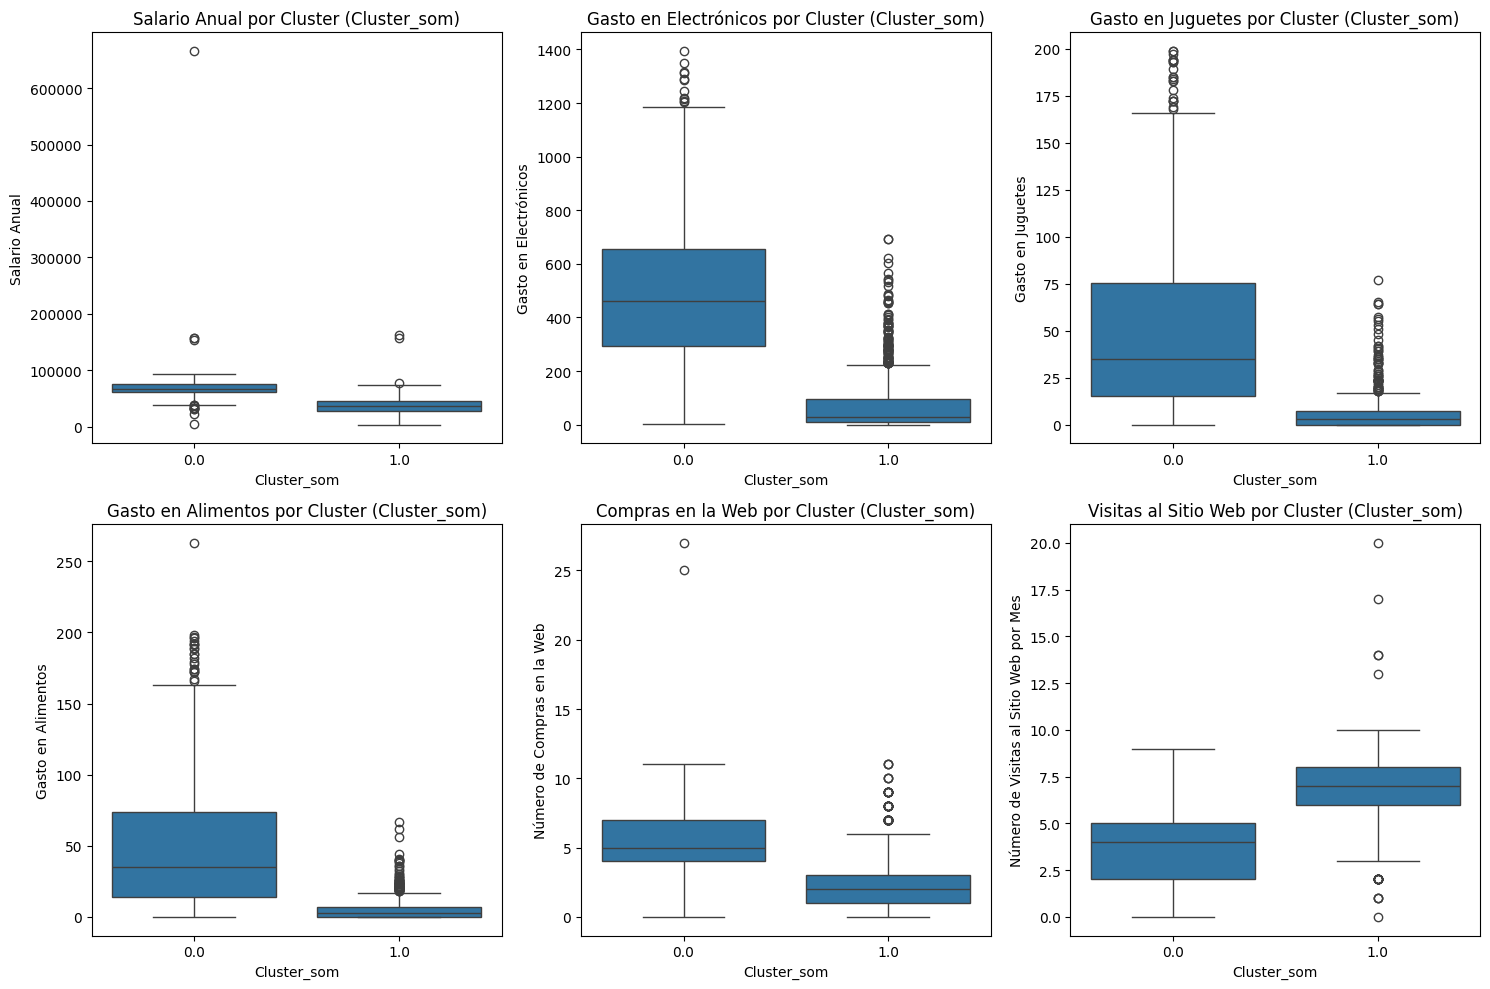

ID  Año de Nacimiento  Salario Anual  Niños en Casa  \
Cluster_som                                                                 
0.0          5689.955345        1966.060893   68512.610054       0.075778   
1.0          5607.537229        1971.034873   36834.767398       0.762488   

             Adolescentes en Casa  Días Desde la Última Compra  \
Cluster_som                                                      
0.0                      0.530447                    44.545332   
1.0                      0.519321                    43.666352   

             Gasto en Electrónicos  Gasto en Juguetes  Gasto en Muebles  \
Cluster_som                                                               
0.0                     495.857916          50.335589        294.867388   
1.0                      74.571159           5.336475         31.915174   

             Gasto en Artículos para el Hogar  ...    Compró  Recencia  \
Cluster_som                                    ...                       
0.0                                 69.972936  ...  0.109608  0.000095   
1.0                                  7.685203  ...  0.109331 -0.017549   

             Frecuencia  ValorMonetario  Cluster_kmeans  Cluster_kprototypes  \
Cluster_som                                                                    
0.0            0.769079        0.713220        0.013532             0.909337   
1.0           -0.713815       -0.762556        0.979265             0.006598   

             Cluster_pam  Cluster_diana  Cluster_birch  Cluster_clarans  
Cluster_som                                                              
0.0             0.005413       1.928281       0.056834       925.826793  
1.0             0.754006       1.087653       0.843544       901.871819  

[2 rows x 32 columns]

In [ ]:
# Análisis descriptivo de los clusters
def describe_clusters(df, cluster_col):
    cluster_description = df.groupby(cluster_col).mean(numeric_only=True)
    return cluster_description

# Describir los clusters para SOM
cluster_col = 'Cluster_som'
description_som = describe_clusters(df, cluster_col)

# Visualizar las distribuciones de algunas variables para cada cluster
plt.figure(figsize=(15, 10))

# Ejemplo de visualización para 'Salario Anual'
plt.subplot(2, 3, 1)
sns.boxplot(x=cluster_col, y='Salario Anual', data=df)
plt.title(f'Salario Anual por Cluster ({cluster_col})')

# Ejemplo de visualización para 'Gasto en Electrónicos'
plt.subplot(2, 3, 2)
sns.boxplot(x=cluster_col, y='Gasto en Electrónicos', data=df)
plt.title(f'Gasto en Electrónicos por Cluster ({cluster_col})')

# Ejemplo de visualización para 'Gasto en Juguetes'
plt.subplot(2, 3, 3)
sns.boxplot(x=cluster_col, y='Gasto en Juguetes', data=df)
plt.title(f'Gasto en Juguetes por Cluster ({cluster_col})')

# Ejemplo de visualización para 'Gasto en Alimentos'
plt.subplot(2, 3, 4)
sns.boxplot(x=cluster_col, y='Gasto en Alimentos', data=df)
plt.title(f'Gasto en Alimentos por Cluster ({cluster_col})')

# Ejemplo de visualización para 'Número de Compras en la Web'
plt.subplot(2, 3, 5)
sns.boxplot(x=cluster_col, y='Número de Compras en la Web', data=df)
plt.title(f'Compras en la Web por Cluster ({cluster_col})')

# Ejemplo de visualización para 'Número de Visitas al Sitio Web por Mes'
plt.subplot(2, 3, 6)
sns.boxplot(x=cluster_col, y='Número de Visitas al Sitio Web por Mes', data=df)
plt.title(f'Visitas al Sitio Web por Cluster ({cluster_col})')

plt.tight_layout()
plt.show()

description_som